In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set(style="ticks", color_codes=True)

***
### Análise dos dados do INFOSIGA - Acidentes de trânsito com óbitos (Estado de São Paulo)
- Local dos arquivos das bases de 2015 a 2019: http://www.infosiga.sp.gov.br/Home/Relatorio
- Etapas:
    1. Exploração dos dados
    2. Correção, limpeza e substituição de dados ausentes
    3. Análise exploratória dos dados (Visualização e definição das relações entre variáveis)

### Resumo da Análise exploratória dos dados

- Principais variáves para entender o maior número de óbitos:
    - __Dias da Semana:__ aumento nos finais de semana, principalmente no DOMINGO
    - __Horário do dia:__ dependente do tipo de via:
        - Vias Municipais: aumento no período da NOITE e TARDE
        - Rodovias: aumento do período da NOITE e MADRUGADA
    - __Tipo de Veículo:__ dependente da IDADE das vítimas
        - MOTOCICLETAS entre os mais jovens e AUTOMÓVEIS entre os mais velhos)
    - __Tipo de Acidente:__ dependente da idade, com diferença entre ESTADO e CAPITAL e dependente da Região Administrativa:
        - ESTADO - Mais jovens (18-24): COLISÃO | Mais velhos (35-39): COLISÃO e ATROPELAMENTO | Acima de 65: ATROPELAMENTO
        - CAPITAL - Mais jovens (18-24): COLISÃO e CHOQUE | Mais velhos: acima de 35: ATROPELAMENTO
        - Metropolitana: elevado índice de ATROPELAMENTOS | Demais regiões: COLISÃO
    - __Gravidade dos acidentes:__ quase a maioria dos óbitos acontecem no mesmo dia do acidente o que india a gravidade do acidente

### 1. Exploração dos dados


#### Lendo os arquivos

In [4]:
base_2015 = pd.read_csv('Base_INFOSIGA_2015.csv', encoding='latin-1', sep=';', header=0)
base_2016 = pd.read_csv('Base_INFOSIGA_2016.csv', encoding='latin-1', sep=';', header=0)
base_2017 = pd.read_csv('Base_INFOSIGA_2017.csv', encoding='latin-1', sep=';', header=0)
base_2018 = pd.read_csv('Base_INFOSIGA_2018.csv', encoding='latin-1', sep=';', header=0)
base_2019 = pd.read_csv('Base_INFOSIGA_2019.csv', encoding='latin-1', sep=';', header=0)

#### Explorando os arquivos
- Identificação das colunas, número de linhas e de dados ausentes
    - obs.: Todos os anos possuem o mesmo número e ordem de colunas
- Mantendo cada ano de forma separada para que as correções sejam coerentes com os dados relativos a cada ano

In [5]:
# Base de 2015
# Colunas 'SubTipo do Acidente' e 'Outro Veículo Envolvido' com muitos dados ausentes - foi usado parcialmente na análise
# Colunas 'Tipo Local do Acidente, 'Dia Semana' e 'Tempo entre Acidente e o Óbito' - dados ausentes serão corrigidos

print('____Colunas e quantidade de dados')
print(base_2015.info())
print('-'*60)
print('____Número de dados ausentes de cada coluna')
print(base_2015.isnull().sum())

base_2015.head()

____Colunas e quantidade de dados
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 23 columns):
Id Infosiga                       6468 non-null int64
Cidade Considerada                6468 non-null object
Região Administrativa             6468 non-null object
Ano Óbito                         6468 non-null int64
Mês Óbito                         6468 non-null int64
Mês Descrição                     6468 non-null object
Sexo                              6121 non-null object
Turno                             6468 non-null object
Tipo Acidente                     6468 non-null object
SubTipo do Acidente               529 non-null object
Tipo Veiculo                      6468 non-null object
Faixa Etária                      6468 non-null object
Idade                             6468 non-null object
Tipo Vítima                       6468 non-null object
Tipo Local do Acidente            5969 non-null object
Dia Semana                        6145

,Id Infosiga,Cidade Considerada,Região Administrativa,Ano Óbito,Mês Óbito,Mês Descrição,Sexo,Turno,Tipo Acidente,SubTipo do Acidente,...,Tipo Vítima,Tipo Local do Acidente,Dia Semana,Tipo de Via,LAT_(geo),LONG_(geo),Rua / Rodovia,KM Arredondado,Outro Veículo Envolvido,Tempo entre Acidente e o Óbito
0,9577,ALUMINIO,Sorocaba,2015,9,SETEMBRO,NaN,MANHA,OUTROS,NaN,...,CONDUTOR,PUBLICO,TERÇA,Vias Municipais,-2.350.899.846,-4.745.910.385,RUA CLAUDIO MANOEL DA COSTA,564,NaN,Mesmo dia
1,7767,AMERICANA,Campinas,2015,9,SETEMBRO,MASCULINO,MADRUGADA,COLISAO,NaN,...,CONDUTOR,PUBLICO,DOMINGO,Rodovias,-22.756.649,-47.254.609,SP 330,120,NaN,Mesmo dia
2,7766,AMERICANA,Campinas,2015,9,SETEMBRO,MASCULINO,NOITE,COLISAO,NaN,...,CONDUTOR,PUBLICO,SÁBADO,Vias Municipais,-2.271.530.988,-4.732.492.552,AVENIDA NICOLAU JOAO ABDALA,ND,NaN,Mesmo dia
3,9255,AMERICO DE CAMPOS,São José do Rio Preto,2015,9,SETEMBRO,MASCULINO,NOITE,COLISAO,NaN,...,CONDUTOR,PUBLICO,DOMINGO,Rodovias,-20.306.831,-49.730.104,SP 479,24,NaN,Mesmo dia
4,7532,AMPARO,Campinas,2015,9,SETEMBRO,MASCULINO,MANHA,ATROPELAMENTO,NaN,...,PEDESTRE,PUBLICO,SÁBADO,Vias Municipais,-2.269.467,-4.672.208,AVENIDA ANESIO GUIDE,300,NaN,Mesmo dia


In [6]:
# Base de 2016
# Colunas 'SubTipo do Acidente' e 'Outro Veículo Envolvido' com muitos dados ausentes - foi usado parcialmente na análise
# Colunas 'Tipo Local do Acidente, 'Dia Semana' e 'Tempo entre Acidente e o Óbito' - dados ausentes serão corrigidos

print('____Colunas e quantidade de dados')
print(base_2016.info())
print('-'*60)
print('____Número de dados ausentes de cada coluna')
print(base_2016.isnull().sum())

base_2016.head()

____Colunas e quantidade de dados
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3632 entries, 0 to 3631
Data columns (total 23 columns):
Id Infosiga                       3632 non-null int64
Cidade Considerada                3632 non-null object
Região Administrativa             3632 non-null object
Ano Óbito                         3632 non-null int64
Mês Óbito                         3632 non-null int64
Mês Descrição                     3632 non-null object
Sexo                              3589 non-null object
Turno                             3632 non-null object
Tipo Acidente                     3632 non-null object
SubTipo do Acidente               387 non-null object
Tipo Veiculo                      3632 non-null object
Faixa Etária                      3632 non-null object
Idade                             3632 non-null object
Tipo Vítima                       3632 non-null object
Tipo Local do Acidente            3504 non-null object
Dia Semana                        3631

,Id Infosiga,Cidade Considerada,Região Administrativa,Ano Óbito,Mês Óbito,Mês Descrição,Sexo,Turno,Tipo Acidente,SubTipo do Acidente,...,Tipo Vítima,Tipo Local do Acidente,Dia Semana,Tipo de Via,LAT_(geo),LONG_(geo),Rua / Rodovia,KM Arredondado,Outro Veículo Envolvido,Tempo entre Acidente e o Óbito
0,11723,BARRETOS,Barretos,2016,2,FEVEREIRO,MASCULINO,NOITE,COLISAO,SubTipo do Acidente,...,CONDUTOR,PUBLICO,SEXTA,Rodovias,-2.055.111.617,-4.859.183.139,SP 326,424,Outro Veículo Envolvido,Mesmo dia
1,11909,BARUERI,Metropolitana de São Paulo,2016,2,FEVEREIRO,FEMININO,TARDE,NAO DISPONIVEL,NaN,...,NAO DISPONIVEL,PUBLICO,SEXTA,Rodovias,-2.350.494.785,-4.687.207.976,SP 280,26,NaN,Mesmo dia
2,51770,BATATAIS,Franca,2016,2,FEVEREIRO,MASCULINO,TARDE,OUTROS,QUEDA (ÁGUA. BARRANCO. PONTE),...,CONDUTOR,PUBLICO,SEXTA,Vias Municipais,-20.869.552,-47.536.311,ESTRADA MUN. PREF. GERALDO MARINHEIRO,5,NÃO HÁ,Mesmo dia
3,51769,BATATAIS,Franca,2016,2,FEVEREIRO,FEMININO,TARDE,OUTROS,QUEDA (ÁGUA. BARRANCO. PONTE),...,PASSAGEIRO,PUBLICO,SEXTA,Vias Municipais,-20.869.552,-47.536.311,ESTRADA MUN. PREF. GERALDO MARINHEIRO,5,NÃO HÁ,Mesmo dia
4,51768,BATATAIS,Franca,2016,2,FEVEREIRO,FEMININO,TARDE,OUTROS,QUEDA (ÁGUA. BARRANCO. PONTE),...,PASSAGEIRO,PUBLICO,SEXTA,Vias Municipais,-20.869.552,-47.536.311,ESTRADA MUN. PREF. GERALDO MARINHEIRO,5,NÃO HÁ,Mesmo dia


In [7]:
# Base de 2017
# Colunas 'SubTipo do Acidente' e  com muitos dados ausentes - não foi na análise
# Colunas 'Outro Veículo Envolvido', 'Tipo Local do Acidente, 'Dia Semana' e 'Tempo entre Acidente e o Óbito'
# dados ausentes serão corrigidos

print('____Colunas e quantidade de dados')
print(base_2017.info())
print('-'*60)
print('____Número de dados ausentes de cada coluna')
print(base_2017.isnull().sum())

base_2017.head()

____Colunas e quantidade de dados
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5658 entries, 0 to 5657
Data columns (total 23 columns):
Id Infosiga                       5658 non-null int64
Cidade Considerada                5658 non-null object
Região Administrativa             5658 non-null object
Ano Óbito                         5658 non-null int64
Mês Óbito                         5658 non-null int64
Mês Descrição                     5658 non-null object
Sexo                              5655 non-null object
Turno                             5658 non-null object
Tipo Acidente                     5658 non-null object
SubTipo do Acidente               280 non-null object
Tipo Veiculo                      5658 non-null object
Faixa Etária                      5658 non-null object
Idade                             5658 non-null object
Tipo Vítima                       5658 non-null object
Tipo Local do Acidente            5655 non-null object
Dia Semana                        5657

,Id Infosiga,Cidade Considerada,Região Administrativa,Ano Óbito,Mês Óbito,Mês Descrição,Sexo,Turno,Tipo Acidente,SubTipo do Acidente,...,Tipo Vítima,Tipo Local do Acidente,Dia Semana,Tipo de Via,LAT_(geo),LONG_(geo),Rua / Rodovia,KM Arredondado,Outro Veículo Envolvido,Tempo entre Acidente e o Óbito
0,20854,AGUAS DE LINDOIA,Campinas,2017,9,SETEMBRO,MASCULINO,TARDE,ATROPELAMENTO,NaN,...,PEDESTRE,PUBLICO,DOMINGO,Vias Municipais,-22.480.843,-46.596.416,RUA B ALVES BARBOSA,385,AUTOMOVEL,Mesmo dia
1,20590,ALTINOPOLIS,Ribeirão Preto,2017,9,SETEMBRO,MASCULINO,NOITE,OUTROS,NaN,...,CONDUTOR,PUBLICO,SEGUNDA,Rodovias,-2.102.362.225,-4.725.415.377,SP 351,12,NAO DISPONIVEL,Mesmo dia
2,21024,AMERICANA,Campinas,2017,9,SETEMBRO,MASCULINO,NOITE,COLISAO,NaN,...,CONDUTOR,PUBLICO,DOMINGO,Vias Municipais,-22.729.454,-47.320.204,RUA SAO SEBASTIAO,ND,AUTOMOVEL,Até 7 dias
3,20985,AMERICANA,Campinas,2017,9,SETEMBRO,MASCULINO,MADRUGADA,NAO DISPONIVEL,NaN,...,NAO DISPONIVEL,PUBLICO,DOMINGO,Vias Municipais,-22.765.891,-473.429,AVENIDA DE CILLOS,ND,NAO DISPONIVEL,Até 30 dias
4,20638,AMERICO BRASILIENSE,Central,2017,9,SETEMBRO,MASCULINO,NOITE,COLISAO,NaN,...,CONDUTOR,PUBLICO,SEXTA,Rodovias,-2.171.398.144,-4.803.491.521,SP 255,64,CAMINHAO,Mesmo dia


In [8]:
# Base 2018
# Sem dados ausentes

print('____Colunas e quantidade de dados')
print(base_2018.info())
print('-'*60)
print('____Número de dados ausentes de cada coluna')
print(base_2018.isnull().sum())

base_2018.head()

____Colunas e quantidade de dados
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5459 entries, 0 to 5458
Data columns (total 23 columns):
Id Infosiga                       5459 non-null int64
Cidade Considerada                5459 non-null object
Região Administrativa             5459 non-null object
Ano Óbito                         5459 non-null int64
Mês Óbito                         5459 non-null int64
Mês Descrição                     5459 non-null object
Sexo                              5459 non-null object
Turno                             5459 non-null object
Tipo Acidente                     5459 non-null object
SubTipo do Acidente               5459 non-null object
Tipo Veiculo                      5459 non-null object
Faixa Etária                      5459 non-null object
Idade                             5459 non-null object
Tipo Vítima                       5459 non-null object
Tipo Local do Acidente            5459 non-null object
Dia Semana                        545

,Id Infosiga,Cidade Considerada,Região Administrativa,Ano Óbito,Mês Óbito,Mês Descrição,Sexo,Turno,Tipo Acidente,SubTipo do Acidente,...,Tipo Vítima,Tipo Local do Acidente,Dia Semana,Tipo de Via,LAT_(geo),LONG_(geo),Rua / Rodovia,KM Arredondado,Outro Veículo Envolvido,Tempo entre Acidente e o Óbito
0,52762,ADAMANTINA,Presidente Prudente,2018,9,SETEMBRO,MASCULINO,TARDE,COLISAO,FRONTAL,...,CONDUTOR,PUBLICO,QUARTA,Rodovias,-2.167.348.528,-5.106.730.006,SP 294,593,CAMINHAO,Mesmo dia
1,53262,ALAMBARI,Sorocaba,2018,9,SETEMBRO,MASCULINO,NAO DISPONIVEL,OUTROS,TOMBAMENTO VEÍCULO DE 2 RODAS,...,CONDUTOR,PUBLICO,SÁBADO,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,ND,NÃO HÁ,Até 30 dias
2,52913,ALTINOPOLIS,Ribeirão Preto,2018,9,SETEMBRO,MASCULINO,TARDE,COLISAO,TRANSVERSAL,...,CONDUTOR,PUBLICO,DOMINGO,Rodovias,-2.101.146.936,-4.739.666.736,SP 351,26,AUTOMOVEL,Mesmo dia
3,52716,ALVARES MACHADO,Presidente Prudente,2018,9,SETEMBRO,MASCULINO,NOITE,COLISAO,LATERAL,...,CONDUTOR,PUBLICO,SEXTA,Vias Municipais,-22.121.073,-51.516.007,VICINAL VEREADOR JOSE MOLINA,9,AUTOMOVEL,Mesmo dia
4,52907,AMERICANA,Campinas,2018,9,SETEMBRO,MASCULINO,MADRUGADA,COLISAO,TRASEIRA,...,CONDUTOR,PUBLICO,SÁBADO,Rodovias,-2.276.030.063,-473.300.732,SP 304,128,AUTOMOVEL,Mesmo dia


In [9]:
# Base 2019
# Sem dados ausentes

print('____Colunas e quantidade de dados')
print(base_2019.info())
print('-'*60)
print('____Número de dados ausentes de cada coluna')
print(base_2019.isnull().sum())

base_2019.head()

____Colunas e quantidade de dados
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 23 columns):
Id Infosiga                       1205 non-null int64
Cidade Considerada                1205 non-null object
Região Administrativa             1205 non-null object
Ano Óbito                         1205 non-null int64
Mês Óbito                         1205 non-null int64
Mês Descrição                     1205 non-null object
Sexo                              1205 non-null object
Turno                             1205 non-null object
Tipo Acidente                     1205 non-null object
SubTipo do Acidente               1205 non-null object
Tipo Veiculo                      1205 non-null object
Faixa Etária                      1205 non-null object
Idade                             1205 non-null object
Tipo Vítima                       1205 non-null object
Tipo Local do Acidente            1205 non-null object
Dia Semana                        120

,Id Infosiga,Cidade Considerada,Região Administrativa,Ano Óbito,Mês Óbito,Mês Descrição,Sexo,Turno,Tipo Acidente,SubTipo do Acidente,...,Tipo Vítima,Tipo Local do Acidente,Dia Semana,Tipo de Via,LAT_(geo),LONG_(geo),Rua / Rodovia,KM Arredondado,Outro Veículo Envolvido,Tempo entre Acidente e o Óbito
0,92266,AMERICANA,Campinas,2019,3,MARÇO,MASCULINO,NOITE,COLISAO,FRONTAL,...,CONDUTOR,PUBLICO,SEGUNDA,Vias Municipais,-22.727.016,-4.734.192,AVENIDA SAO JERONIMO,0,AUTOMOVEL,Até 7 dias
1,92415,ANDRADINA,Araçatuba,2019,3,MARÇO,MASCULINO,TARDE,OUTROS,OUTROS,...,PASSAGEIRO,PUBLICO,SÁBADO,Rodovias,-2.090.367.678,-5.134.691.594,SP 300,637,OUTROS,Mesmo dia
2,92410,ANDRADINA,Araçatuba,2019,3,MARÇO,MASCULINO,MADRUGADA,CHOQUE,VEÍCULO ESTACIONADO,...,CONDUTOR,PUBLICO,SÁBADO,Vias Municipais,-20.897.931,-51.397.121,RUA LONDRES,588,NÃO HÁ,Mesmo dia
3,92150,ANDRADINA,Araçatuba,2019,3,MARÇO,MASCULINO,MADRUGADA,ATROPELAMENTO,ANIMAL,...,CONDUTOR,PUBLICO,SEGUNDA,Vias Municipais,NAO DISPONIVEL,NAO DISPONIVEL,VICINAL JOSE RODRIGUES CELESTINO,30,OUTROS,Mesmo dia
4,92187,ANGATUBA,Itapeva,2019,3,MARÇO,MASCULINO,NOITE,OUTROS,QUEDA (ÁGUA. BARRANCO. PONTE),...,CONDUTOR,PUBLICO,QUARTA,Vias Municipais,NAO DISPONIVEL,NAO DISPONIVEL,ESTRADA DERRADEIRO POUSO,ND,NÃO HÁ,Mesmo dia


### 2. Correção, limpeza e substituição de dados ausentes
- __Colunas a deletar:__
    - Foi verificado que todos as bases de dados têm as mesmas colunas e elas estão na mesma ordem
    - Não são necessárias as seguintes colunas, para essa análise:
        - Id Infosiga
        - KM Arredondado

In [10]:
#______________________________RODAR
# Criação de uma lista com todas as bases de dados para fazer as modificações em todos ao mesmo tempo
data = [base_2015, base_2016, base_2017, base_2018, base_2019]

#lista das colunas a deletar
drop_col = ['Id Infosiga', 'KM Arredondado']

In [11]:
#______________________________RODAR
# deletando as colunas desnecessárias:

for dataset in data:
    dataset.drop(drop_col, axis=1, inplace=True)

In [12]:
# Conferindo as colunas restantes (21 no total)
base_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 21 columns):
Cidade Considerada                1205 non-null object
Região Administrativa             1205 non-null object
Ano Óbito                         1205 non-null int64
Mês Óbito                         1205 non-null int64
Mês Descrição                     1205 non-null object
Sexo                              1205 non-null object
Turno                             1205 non-null object
Tipo Acidente                     1205 non-null object
SubTipo do Acidente               1205 non-null object
Tipo Veiculo                      1205 non-null object
Faixa Etária                      1205 non-null object
Idade                             1205 non-null object
Tipo Vítima                       1205 non-null object
Tipo Local do Acidente            1205 non-null object
Dia Semana                        1205 non-null object
Tipo de Via                       1205 non-null object
LAT_(geo)      

- __Colunas com valores nulos:__
    - Sexo (poucos dados nulos: utilizar a moda - valor mais citado)
    - SubTipo do Acidente (muitos dados nulos - indicar como 'NAO HA')
    - Tipo Local do Acidente (alguns dados: utilizar a moda - valor mais citado)
    - Dia Semana (poucos dados nulos: utilizar a moda - valor mais citado)
    - Outro Veículo Envolvido (2015 e 2016 esse dado quase não foi preenchido. 2017 2018 e 2019 tem dados: substituir com a moda - valor mais citado foi 'AUTOMOVEL' em todas as bases)
    - Tempo entre Acidente e o Óbito (poucos dados nulos: utilizar a moda - valor mais citado)

In [13]:
base_2015['Sexo'].value_counts()

MASCULINO         5015
FEMININO          1092
NAO DISPONIVEL      14
Name: Sexo, dtype: int64

In [14]:
base_2015['SubTipo do Acidente'].value_counts()

NAO DISPONIVEL                           155
CAPOTAMENTO                               41
FRONTAL                                   38
CRUZANDO A VIA                            33
LATERAL                                   29
TRASEIRA                                  28
TOMBAMENTO VEÍCULO DE 2 RODAS             27
POSTE                                     26
TRANSVERSAL                               22
MURO/PAREDE/TALUDE                        20
ANDANDO NA VIA / ACOSTAMENTO              20
ÁRVORE                                    17
VEÍCULO ESTACIONADO                       12
DEFENSA / BARREIRA                        11
OUTROS                                    11
TOMBAMENTO VEÍCULO DE MAIS DE 2 RODAS      9
MEIO-FIO/CALÇAMENTO/DRENAGEM               7
QUEDA (ÁGUA. BARRANCO. PONTE)              5
NA CALÇADA                                 5
CONDUTOR/PASSAGEIROS FORA DO VEÍCULO       4
ANIMAL                                     4
ENGAVETAMENTO                              2
PLACA DE S

In [15]:
base_2015['Tipo Local do Acidente'].value_counts()

PUBLICO           5878
PRIVADO             54
NAO DISPONIVEL      37
Name: Tipo Local do Acidente, dtype: int64

In [16]:
base_2015['Dia Semana'].value_counts()

DOMINGO    1190
SÁBADO     1184
SEXTA       880
SEGUNDA     761
QUINTA      741
QUARTA      735
TERÇA       654
Name: Dia Semana, dtype: int64

In [17]:
base_2015['Outro Veículo Envolvido'].value_counts()

AUTOMOVEL         176
NÃO HÁ            151
NAO DISPONIVEL     74
CAMINHAO           58
MOTOCICLETA        45
ONIBUS             27
OUTROS              2
BICICLETA           1
Name: Outro Veículo Envolvido, dtype: int64

In [18]:
base_2019['Tempo entre Acidente e o Óbito'].value_counts()

Mesmo dia          882
Até 30 dias        103
Até 7 dias         102
Dia anterior        63
Mais de 30 dias     55
Name: Tempo entre Acidente e o Óbito, dtype: int64

In [19]:
#______________________________RODAR
# Completando valores nulos:

for dataset in data:
    #completar com a moda - Sexo, Tipo Local do Acidente, Dia Semana, Outro Veículo Envolvido, Tempo entre Acidente e o Óbito
    dataset['Sexo'].fillna(dataset['Sexo'].mode()[0], inplace = True)
    dataset['Tipo Local do Acidente'].fillna(dataset['Tipo Local do Acidente'].mode()[0], inplace = True)
    dataset['Dia Semana'].fillna(dataset['Dia Semana'].mode()[0], inplace = True)
    dataset['Outro Veículo Envolvido'].fillna(dataset['Outro Veículo Envolvido'].mode()[0], inplace = True)
    dataset['Tempo entre Acidente e o Óbito'].fillna(dataset['Tempo entre Acidente e o Óbito'].mode()[0], inplace = True)
    
    #completar com 'NAO HA' - SubTipo do Acidente 
    dataset['SubTipo do Acidente'].fillna('NAO HA', inplace=True) 

In [20]:
#______________________________RODAR
base_2017['Dia Semana'].fillna(base_2017['Dia Semana'].mode()[0], inplace = True)

base_2017.isnull().sum()

Cidade Considerada                0
Região Administrativa             0
Ano Óbito                         0
Mês Óbito                         0
Mês Descrição                     0
Sexo                              0
Turno                             0
Tipo Acidente                     0
SubTipo do Acidente               0
Tipo Veiculo                      0
Faixa Etária                      0
Idade                             0
Tipo Vítima                       0
Tipo Local do Acidente            0
Dia Semana                        0
Tipo de Via                       0
LAT_(geo)                         0
LONG_(geo)                        0
Rua / Rodovia                     0
Outro Veículo Envolvido           0
Tempo entre Acidente e o Óbito    0
dtype: int64

- __Colunas com valores estranhos ou sinônimos:__
    - Cidades Consideradas
        - (2015 (530) / 2016 (451) / 2017 (520) / 2018 (528) / 2019 (304) - ano incompleto)
        - Como SP tem 645 municípios, os dados fazem sentido - não precisa corrigir
    - Região Administrativa
        - 16 no total
        - 2017 e 2018 - 'Metropolitana de S??o Paulo', 'São Jos?? do Rio Preto' e '??o José dos Campos' - grafia errada
    - Mês Óbito
        - 2016 não tem dados de todos os meses (cuidado ao analisar os dados em relação ao mês)
    - Sexo
        - eliminar linhas com 'não disponível' - representa menos de 0,50% do total

In [21]:
# Verificação em Cidades consideradas - número de cidades avaliadas
print(base_2015['Cidade Considerada'].nunique(), 'em 2015')
print('-'*60)
print(base_2016['Cidade Considerada'].nunique(), 'em 2016')
print('-'*60)
print(base_2017['Cidade Considerada'].nunique(), 'em 2017')
print('-'*60)
print(base_2018['Cidade Considerada'].nunique(), 'em 2018')
print('-'*60)
print(base_2019['Cidade Considerada'].nunique(), 'em 2019')
print('-'*60)

530 em 2015
------------------------------------------------------------
451 em 2016
------------------------------------------------------------
520 em 2017
------------------------------------------------------------
528 em 2018
------------------------------------------------------------
304 em 2019
------------------------------------------------------------


In [22]:
# Verificação em 'Região Administrativa'
# 2017 e 2018 - 'Metropolitana de S??o Paulo', 'São Jos?? do Rio Preto' e '??o José dos Campos' - grafia errada

print(base_2015['Região Administrativa'].unique())
print('-'*60)
print(base_2016['Região Administrativa'].unique())
print('-'*60)
print(base_2017['Região Administrativa'].unique())
print('-'*60)
print(base_2018['Região Administrativa'].unique())
print('-'*60)
print(base_2019['Região Administrativa'].unique())

['Sorocaba' 'Campinas' 'São José do Rio Preto' 'São José dos Campos'
 'Itapeva' 'Araçatuba' 'Central' 'Metropolitana de São Paulo' 'Franca'
 'Bauru' 'Barretos' 'Marília' 'Baixada Santista' 'Presidente Prudente'
 'Ribeirão Preto' 'Registro']
------------------------------------------------------------
['Barretos' 'Metropolitana de São Paulo' 'Franca' 'Bauru' 'Araçatuba'
 'Sorocaba' 'Campinas' 'São José dos Campos' 'Ribeirão Preto' 'Itapeva'
 'São José do Rio Preto' 'Central' 'Baixada Santista' 'Registro'
 'Presidente Prudente' 'Marília']
------------------------------------------------------------
['Campinas' 'Ribeirão Preto' 'Central' 'São José dos Campos' 'Sorocaba'
 'Araçatuba' 'Marília' 'Barretos' 'Metropolitana de São Paulo' 'Franca'
 'Bauru' 'Baixada Santista' 'Registro' 'Itapeva' 'São José do Rio Preto'
 'Presidente Prudente' 'São Jos?? do Rio Preto']
------------------------------------------------------------
['Presidente Prudente' 'Sorocaba' 'Ribeirão Preto' 'Campinas' 'Centra

In [23]:
# Verificação dos meses avaliados
a = base_2015['Mês Óbito'].unique()
print(np.sort(a), '2015')
print('-'*60)
b = base_2016['Mês Óbito'].unique()
print(np.sort(b), 'Faltam os meses de 6, 7, 8, 9 de 2016')
print('-'*60)
c = base_2017['Mês Óbito'].unique()
print(np.sort(c), '2017')
print('-'*60)
d = base_2018['Mês Óbito'].unique()
print(np.sort(d), '2018')
print('-'*60)
e = base_2019['Mês Óbito'].unique()
print(np.sort(e), 'Completo até mês de março de 2019') 

[ 1  2  3  4  5  6  7  8  9 10 11 12] 2015
------------------------------------------------------------
[ 1  2  3  4  5 10 11 12] Faltam os meses de 6, 7, 8, 9 de 2016
------------------------------------------------------------
[ 1  2  3  4  5  6  7  8  9 10 11 12] 2017
------------------------------------------------------------
[ 1  2  3  4  5  6  7  8  9 10 11 12] 2018
------------------------------------------------------------
[1 2 3] Completo até mês de março de 2019


In [24]:
# Verificação dos dados em Sexo
print(base_2015['Sexo'].unique(), '2015')
print('-'*60)
print(base_2016['Sexo'].unique(), '2016')
print('-'*60)
print(base_2017['Sexo'].unique(), '2017')
print('-'*60)
print(base_2018['Sexo'].unique(), '2018')
print('-'*60)
print(base_2019['Sexo'].unique(), '2019')

['MASCULINO' 'FEMININO' 'NAO DISPONIVEL'] 2015
------------------------------------------------------------
['MASCULINO' 'FEMININO' 'NAO DISPONIVEL'] 2016
------------------------------------------------------------
['MASCULINO' 'FEMININO' 'NAO DISPONIVEL'] 2017
------------------------------------------------------------
['MASCULINO' 'FEMININO' 'NAO DISPONIVEL'] 2018
------------------------------------------------------------
['MASCULINO' 'FEMININO'] 2019


In [25]:
# Grafia errada no ano de 2018 - TOMBAMENTO VE??CULO DE 2 RODAS por TOMBAMENTO VEÍCULO DE 2 RODAS
print(base_2015['SubTipo do Acidente'].unique(), '2015')
print('-'*60)
print(base_2016['SubTipo do Acidente'].unique(), '2016')
print('-'*60)
print(base_2017['SubTipo do Acidente'].unique(), '2017')
print('-'*60)
print(base_2018['SubTipo do Acidente'].unique(), '2018')
print('-'*60)
print(base_2019['SubTipo do Acidente'].unique(), '2019')

['NAO HA' 'TOMBAMENTO VEÍCULO DE 2 RODAS' 'CAPOTAMENTO' 'FRONTAL'
 'QUEDA (ÁGUA. BARRANCO. PONTE)' 'NAO DISPONIVEL' 'POSTE'
 'DEFENSA / BARREIRA' 'ÁRVORE' 'TRASEIRA' 'LATERAL' 'CRUZANDO A VIA'
 'TRANSVERSAL' 'TOMBAMENTO VEÍCULO DE MAIS DE 2 RODAS' 'SUBMERSÃO'
 'ANDANDO NA VIA / ACOSTAMENTO' 'VEÍCULO ESTACIONADO' 'OUTROS'
 'MURO/PAREDE/TALUDE' 'MEIO-FIO/CALÇAMENTO/DRENAGEM'
 'CONDUTOR/PASSAGEIROS FORA DO VEÍCULO' 'NA CALÇADA' 'ANIMAL'
 'ENGAVETAMENTO' 'OBJETO NA PISTA' 'PLACA DE SINALIZAÇÃO'] 2015
------------------------------------------------------------
['SubTipo do Acidente' 'NAO HA' 'QUEDA (ÁGUA. BARRANCO. PONTE)'
 'NAO DISPONIVEL' 'TOMBAMENTO VEÍCULO DE MAIS DE 2 RODAS' 'CAPOTAMENTO'
 'FRONTAL' 'MURO/PAREDE/TALUDE' 'DEFENSA / BARREIRA'
 'CONDUTOR/PASSAGEIROS FORA DO VEÍCULO' 'ANDANDO NA VIA / ACOSTAMENTO'
 'CRUZANDO A VIA' 'MEIO-FIO/CALÇAMENTO/DRENAGEM' 'TRASEIRA' 'POSTE'
 'TOMBAMENTO VEÍCULO DE 2 RODAS' 'LATERAL' 'OUTROS' 'ÁRVORE' 'TRANSVERSAL'
 'VEÍCULO ESTACIONADO' 'NA CALÇADA

In [26]:
# Grafia errada no ano de 2016 - Privado por PRIVADO
print(base_2015['Tipo Local do Acidente'].unique(), '2015')
print('-'*60)
print(base_2016['Tipo Local do Acidente'].unique(), '2016')
print('-'*60)
print(base_2017['Tipo Local do Acidente'].unique(), '2017')
print('-'*60)
print(base_2018['Tipo Local do Acidente'].unique(), '2018')
print('-'*60)
print(base_2019['Tipo Local do Acidente'].unique(), '2019')

['PUBLICO' 'NAO DISPONIVEL' 'PRIVADO'] 2015
------------------------------------------------------------
['PUBLICO' 'PRIVADO' 'NAO DISPONIVEL' 'Privado'] 2016
------------------------------------------------------------
['PUBLICO' 'NAO DISPONIVEL' 'PRIVADO'] 2017
------------------------------------------------------------
['PUBLICO' 'NAO DISPONIVEL' 'PRIVADO'] 2018
------------------------------------------------------------
['PUBLICO' 'NAO DISPONIVEL' 'PRIVADO'] 2019


In [27]:
#______________________________________RODAR
# Corrigindo dados errados

for dataset in data:
    #corrigindo grafia errada em 'Região Administrativa'
    dataset['Região Administrativa'] = dataset['Região Administrativa'].replace(['Metropolitana de S??o Paulo'],
                                                                                'Metropolitana de São Paulo')
    dataset['Região Administrativa'] = dataset['Região Administrativa'].replace(['São Jos?? do Rio Preto'],
                                                                                'São José do Rio Preto')
    dataset['Região Administrativa'] = dataset['Região Administrativa'].replace(['S??o José dos Campos'],
                                                                                'São José dos Campos')
    #corrigindo grafia errada em 'SubTipo do Acidente'
    base_2018['SubTipo do Acidente'] = base_2018['SubTipo do Acidente'].replace(['TOMBAMENTO VE??CULO DE 2 RODAS'],
                                                                                'TOMBAMENTO VEÍCULO DE 2 RODAS')
    #2016 - substituir privado por PRIVADO
    base_2016['Tipo Local do Acidente'] = base_2016['Tipo Local do Acidente'].replace(['Privado'], 'PRIVADO')

In [28]:
#_______________________________RODAR
#eliminando linhas com sexo 'NAO DISPONIVEL'
base_2015 = base_2015[~base_2015['Sexo'].str.contains('NAO DISPONIVEL')]
base_2016 = base_2016[~base_2016['Sexo'].str.contains('NAO DISPONIVEL')]
base_2017 = base_2017[~base_2017['Sexo'].str.contains('NAO DISPONIVEL')]
base_2018 = base_2018[~base_2018['Sexo'].str.contains('NAO DISPONIVEL')]
base_2019 = base_2019[~base_2019['Sexo'].str.contains('NAO DISPONIVEL')]

In [29]:
#conferindo substituição
base_2016['Sexo'].value_counts()

MASCULINO    2944
FEMININO      684
Name: Sexo, dtype: int64

In [30]:
#conferindo substituição
print(base_2017['Região Administrativa'].unique(), '2018')

['Campinas' 'Ribeirão Preto' 'Central' 'São José dos Campos' 'Sorocaba'
 'Araçatuba' 'Marília' 'Barretos' 'Metropolitana de São Paulo' 'Franca'
 'Bauru' 'Baixada Santista' 'Registro' 'Itapeva' 'São José do Rio Preto'
 'Presidente Prudente'] 2018


In [31]:
#Substituir dados 'NAO DISPONIVEL' em Idade pela mediana de cada ano
#Valores muito altos (115, 118, 99) serão substituídos posteriormente
base_2015['Idade'].unique()

array(['68', '69', '49', '28', '7', '62', '24', '30', '23', '33', '19',
       '59', '34', '45', '32', '46', '18', '25', '61', '58', '70', '57',
       '48', '50', '31', '40', '20', '52', '3', '15', '44', '54', '42',
       '75', '29', '55', '21', '27', '1', '41', '63', '43', '82',
       'NAO DISPONIVEL', '85', '17', '38', '2', '26', '35', '47', '22',
       '71', '16', '64', '51', '67', '36', '77', '98', '81', '78', '66',
       '37', '14', '80', '79', '65', '39', '60', '9', '84', '53', '76',
       '73', '72', '74', '88', '13', '12', '86', '56', '83', '4', '87',
       '11', '89', '10', '92', '5', '0', '8', '94', '91', '90', '93', '6',
       '115'], dtype=object)

In [32]:
#___________________________RODAR
#Substituir Idade NAO DISPONIVEL pela mediana

for dataset in data:
    #primeiro: substituir 'NAO DISPONÍVEL' por 'NAO DISPONIVEL' - igualar grafia para todos os anos
    dataset['Idade'] = dataset['Idade'].replace(['NAO DISPONÍVEL'], 'NAO DISPONIVEL')
#   não funcionou!!   
#   dataset['Idade'] = dataset['Idade'].replace(['NAO DISPONIVEL'], np.nan)

#segundo: substituir 'NAO DISPONÍVEL' por NaN
base_2015['Idade'] = base_2015['Idade'].replace(['NAO DISPONIVEL'], np.nan)
base_2016['Idade'] = base_2016['Idade'].replace(['NAO DISPONIVEL'], np.nan)
base_2017['Idade'] = base_2017['Idade'].replace(['NAO DISPONIVEL'], np.nan)
base_2018['Idade'] = base_2018['Idade'].replace(['NAO DISPONIVEL'], np.nan)
base_2019['Idade'] = base_2019['Idade'].replace(['NAO DISPONIVEL'], np.nan)

#terceiro: substituir valres nulos pela mediana
base_2015['Idade'].fillna(base_2015['Idade'].median(), inplace = True)
base_2016['Idade'].fillna(base_2016['Idade'].median(), inplace = True)
base_2017['Idade'].fillna(base_2017['Idade'].median(), inplace = True)
base_2018['Idade'].fillna(base_2018['Idade'].median(), inplace = True)
base_2019['Idade'].fillna(base_2019['Idade'].median(), inplace = True)

In [33]:
# Verificando correção em Idade
base_2016['Idade'].unique()
# base_2017.info()

array(['46', '38', '53', '37', '2', '90', '54', '63', '28', '57', '4',
       '26', '48', '35', '56', 37.0, '17', '43', '15', '25', '32', '23',
       '30', '29', '51', '0', '16', '74', '59', '69', '24', '36', '31',
       '41', '80', '40', '67', '61', '20', '78', '39', '91', '49', '75',
       '18', '33', '14', '77', '21', '50', '76', '68', '8', '73', '19',
       '34', '64', '5', '83', '52', '27', '42', '58', '66', '45', '44',
       '22', '89', '47', '55', '71', '65', '81', '62', '82', '92', '13',
       '87', '79', '60', '84', '86', '70', '3', '7', '72', '10', '11',
       '12', '9', '85', '94', '88', '6', '1', '93', '96'], dtype=object)

In [34]:
#_________________________________RODAR
#substituir em 2017 - S??BADO por SÁBADO
base_2017['Dia Semana'] = base_2017['Dia Semana'].replace(['S??BADO'], 'SÁBADO')

base_2017['Dia Semana'].unique()

array(['DOMINGO', 'SEGUNDA', 'SEXTA', 'TERÇA', 'QUARTA', 'SÁBADO',
       'QUINTA'], dtype=object)

In [35]:
# Existem valores 'NAO DISPONÍVEL' - Será substituído na base completa
base_2017['Turno'].value_counts()

NOITE             1913
MADRUGADA         1148
TARDE             1131
MANHA             1003
NAO DISPONIVEL     441
Name: Turno, dtype: int64

In [36]:
# Existem muitos valores 'NAO DISPONÍVEL' - Será substituído na base completa
base_2019['Tipo Acidente'].value_counts()

COLISAO           474
ATROPELAMENTO     299
CHOQUE            220
OUTROS            174
NAO DISPONIVEL     38
Name: Tipo Acidente, dtype: int64

In [37]:
# Existem muitos valores 'NAO DISPONÍVEL' e 'OUTROS' - Será substituído na base completa
base_2019['Tipo Veiculo'].value_counts()

MOTOCICLETA       439
AUTOMOVEL         310
PEDESTRE          286
BICICLETA          93
CAMINHAO           45
ONIBUS             15
NAO DISPONIVEL     13
OUTROS              4
Name: Tipo Veiculo, dtype: int64

In [38]:
# Existem muitos valores 'NAO DISPONÍVEL' e 'OUTROS' - Será substituído na base completa
base_2019['Tipo Vítima'].value_counts()

CONDUTOR          698
PEDESTRE          286
PASSAGEIRO        189
NAO DISPONIVEL     32
Name: Tipo Vítima, dtype: int64

-----------------------------------
#### Cópia de segurança das bases de dados que foram formatados até aqui

In [39]:
#___________________________________________RODAR
#FAZER UMA CÓPIA dos df para não ter que voltar tudo
base_2015_1 = base_2015.copy()
base_2016_1 = base_2016.copy()
base_2017_1 = base_2017.copy()
base_2018_1 = base_2018.copy()
base_2019_1 = base_2019.copy()

data_1 = [base_2015_1, base_2016_1, base_2017_1, base_2018_1, base_2019_1]

In [40]:
# Verificando cópia das bases
base_2016_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3628 entries, 0 to 3631
Data columns (total 21 columns):
Cidade Considerada                3628 non-null object
Região Administrativa             3628 non-null object
Ano Óbito                         3628 non-null int64
Mês Óbito                         3628 non-null int64
Mês Descrição                     3628 non-null object
Sexo                              3628 non-null object
Turno                             3628 non-null object
Tipo Acidente                     3628 non-null object
SubTipo do Acidente               3628 non-null object
Tipo Veiculo                      3628 non-null object
Faixa Etária                      3628 non-null object
Idade                             3628 non-null object
Tipo Vítima                       3628 non-null object
Tipo Local do Acidente            3628 non-null object
Dia Semana                        3628 non-null object
Tipo de Via                       3628 non-null object
LAT_(geo)      

In [41]:
#_________________________________RODAR
#Substituir em 2016 - Outro Veículo Envolvido por OUTROS
base_2016_1['Outro Veículo Envolvido'] = base_2016_1['Outro Veículo Envolvido'].replace([
                                                     'Outro Veículo Envolvido'], 'OUTROS')
base_2016_1['Outro Veículo Envolvido'].value_counts()

AUTOMOVEL         3362
NÃO HÁ             127
NAO DISPONIVEL      43
CAMINHAO            38
MOTOCICLETA         30
ONIBUS              21
OUTROS               6
PEDESTRE             1
Name: Outro Veículo Envolvido, dtype: int64

In [42]:
#_________________________________________RODAR
# Substituir grafia errada em 2018 - Tempo entre Acidente e o Óbito - At?? 7 dias por Até 7 dias
base_2018_1['Tempo entre Acidente e o Óbito'] = base_2018_1['Tempo entre Acidente e o Óbito'].replace(['At?? 7 dias'],
                                                                                                  'Até 7 dias')
#substituir valor 'Dia anterior' por '1 dia' de todas as bases
for dataset in data_1:
    dataset['Tempo entre Acidente e o Óbito'] = dataset['Tempo entre Acidente e o Óbito'].replace(['Dia anterior'],
                                                                                                  '1 dia')

base_2019_1['Tempo entre Acidente e o Óbito'].value_counts()

Mesmo dia          882
Até 30 dias        103
Até 7 dias         102
1 dia               63
Mais de 30 dias     55
Name: Tempo entre Acidente e o Óbito, dtype: int64

In [43]:
#Criar uma base de dados com todos os dados
base_all = pd.concat(data_1)
print(base_all.info())
base_all.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22371 entries, 0 to 1204
Data columns (total 21 columns):
Cidade Considerada                22371 non-null object
Região Administrativa             22371 non-null object
Ano Óbito                         22371 non-null int64
Mês Óbito                         22371 non-null int64
Mês Descrição                     22371 non-null object
Sexo                              22371 non-null object
Turno                             22371 non-null object
Tipo Acidente                     22371 non-null object
SubTipo do Acidente               22371 non-null object
Tipo Veiculo                      22371 non-null object
Faixa Etária                      22371 non-null object
Idade                             22371 non-null object
Tipo Vítima                       22371 non-null object
Tipo Local do Acidente            22371 non-null object
Dia Semana                        22371 non-null object
Tipo de Via                       22371 non-null objec

,Cidade Considerada,Região Administrativa,Ano Óbito,Mês Óbito,Mês Descrição,Sexo,Turno,Tipo Acidente,SubTipo do Acidente,Tipo Veiculo,...,Idade,Tipo Vítima,Tipo Local do Acidente,Dia Semana,Tipo de Via,LAT_(geo),LONG_(geo),Rua / Rodovia,Outro Veículo Envolvido,Tempo entre Acidente e o Óbito
2023,CAMPINAS,Campinas,2018,5,MAIO,FEMININO,MANHA,COLISAO,NAO DISPONIVEL,MOTOCICLETA,...,57,PASSAGEIRO,PUBLICO,TERÇA,Rodovias,-2.302.849.012,-4.712.894.963,SP 075,AUTOMOVEL,Mesmo dia
3396,ITAPECERICA DA SERRA,Metropolitana de São Paulo,2015,3,MARÇO,MASCULINO,TARDE,NAO DISPONIVEL,NAO HA,NAO DISPONIVEL,...,49,NAO DISPONIVEL,PUBLICO,SEGUNDA,Vias Municipais,-23.700.494,-46.848.831,AVENIDA GUACI FERNANDES DOMINGUES,AUTOMOVEL,Mesmo dia
3364,GUARULHOS,Metropolitana de São Paulo,2015,3,MARÇO,MASCULINO,MANHA,ATROPELAMENTO,NAO HA,PEDESTRE,...,64,PEDESTRE,PUBLICO,TERÇA,Vias Municipais,-23.471.856,-46.433.804,ESTRADA VELHA GUARULHOS-SAO MIGUEL,AUTOMOVEL,Mesmo dia
3333,NOVA GRANADA,São José do Rio Preto,2016,3,MARÇO,MASCULINO,TARDE,CHOQUE,MEIO-FIO/CALÇAMENTO/DRENAGEM,MOTOCICLETA,...,33,CONDUTOR,PUBLICO,SÁBADO,Vias Municipais,-20.531.359,-4.931.671,AVENIDA ADOLFO RODRIGUES,NÃO HÁ,Até 7 dias
4300,FRANCA,Franca,2018,11,NOVEMBRO,MASCULINO,NAO DISPONIVEL,CHOQUE,OUTROS,MOTOCICLETA,...,23,CONDUTOR,PUBLICO,SEXTA,Vias Municipais,NAO DISPONIVEL,NAO DISPONIVEL,RUA JOAQUIM CORREA JUNIOR,NÃO HÁ,Até 7 dias


In [44]:
#Eliminar idades estranhas multo altas (96, 97, 98, 99, 115, 118), são somente 7 dados
base_all['Idade'] = base_all['Idade'].astype('str')
a = base_all['Idade'].unique()
print(np.sort(a))
base_all['Idade'].value_counts()

['0' '1' '10' '11' '115' '118' '12' '13' '14' '15' '16' '17' '18' '19' '2'
 '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33'
 '34' '35' '36' '37' '37.0' '38' '38.0' '39' '4' '40' '41' '41.0' '42'
 '43' '44' '45' '46' '47' '48' '49' '5' '50' '51' '52' '53' '54' '55' '56'
 '57' '58' '59' '6' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '7'
 '70' '71' '72' '73' '74' '75' '76' '77' '78' '79' '8' '80' '81' '82' '83'
 '84' '85' '86' '87' '88' '89' '9' '90' '91' '92' '93' '94' '95' '96' '97'
 '98' '99']


38.0    893
21      617
20      570
22      557
19      496
26      493
23      486
28      476
30      475
25      469
24      451
29      448
34      442
27      441
32      419
35      417
31      411
37      399
18      387
39      387
33      383
36      377
38      374
40      366
42      351
41      347
46      347
50      344
44      339
49      333
       ... 
12       49
86       46
2        46
41.0     44
1        42
87       41
88       40
0        39
10       39
11       35
3        35
89       32
9        32
4        32
5        32
7        31
90       27
6        23
8        22
92       14
91       10
93        8
94        7
95        5
98        2
96        1
118       1
99        1
97        1
115       1
Name: Idade, Length: 105, dtype: int64

In [45]:
#Apagar linhas com idades estranhas 96, 97, 98, 99, 115 e 118
base_all = base_all[~base_all['Idade'].str.contains('96|97|98|99|115|118')]

In [46]:
#_________________________RODAR
#transformando Idade em int64
base_all['Idade'] = base_all['Idade'].astype('float64')
base_all['Idade'] = base_all['Idade'].astype('int64')

# base_all['Idade'].value_counts()
# base_all.info()
base_all['Idade'].unique()

array([68, 69, 49, 28,  7, 62, 24, 30, 23, 33, 19, 59, 34, 45, 32, 46, 18,
       25, 61, 58, 70, 57, 48, 50, 31, 40, 20, 52,  3, 15, 44, 54, 42, 75,
       29, 55, 21, 27,  1, 41, 63, 43, 82, 38, 85, 17,  2, 26, 35, 47, 22,
       71, 16, 64, 51, 67, 36, 77, 81, 78, 66, 37, 14, 80, 79, 65, 39, 60,
        9, 84, 53, 76, 73, 72, 74, 88, 13, 12, 86, 56, 83,  4, 87, 11, 89,
       10, 92,  5,  0,  8, 94, 91, 90, 93,  6, 95], dtype=int64)

In [47]:
print('Idade mínima:', base_all['Idade'].min())
print('Idade máxima:', base_all['Idade'].max())

Idade mínima: 0
Idade máxima: 95


In [48]:
#________________________________________________RODAR
#como eu completei as idades faltantes com a mediana, preciso criar novas faixas etárias condizentes com essas idades
# Vou criar uma nova coluna NOVA_Faixa Etária e dividir as idade 0-13, 14-17, 18-21, 22-24

bins = [0,14,18,22,25,30,35,40,45,50,55,60,65,70,75,80,100]
labels = ['0-13','14-17','18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74',
          '75-79', '80 ou mais']
         
base_all['NOVA_Faixa Etária'] = pd.cut(base_all['Idade'], bins=bins, labels=labels, right= False)
base_all[['Idade', 'NOVA_Faixa Etária']].sample(10)

,Idade,NOVA_Faixa Etária
77,21,18-21
575,35,35-39
4843,44,40-44
3116,29,25-29
3929,61,60-64
4300,23,22-24
252,28,25-29
5099,69,65-69
3815,43,40-44
2164,13,0-13


__Corrigir valores NAO DISPONIVEL das seguintes colunas que tem uma quantidade de aprox.:__
- Tipo Veículo (Ñ1293 - 6% | OUTROS=137 - 0,6% | TOTAL = 7%)
- Turno (1975 - 9%)
- Tipo Acidente (Ñ=1924 - 9% | OUTROS=2833 - 13% | TOTAL - 22%)
- Tipo Vítima (1903 - 8%)
- Tipo de Via (758 - 3%)
- Outro Veículo Envolvido (2641 - 12%)

In [49]:
#_____________________RODAR A PARTIR DAQUI
# Para substituir os valores desconhecidos para tipo de veículo, fazer isso separando as regiões administrativas
base_teste = base_all.copy()

In [50]:
base_teste['Região Administrativa'].unique()

array(['Sorocaba', 'Campinas', 'São José do Rio Preto',
       'São José dos Campos', 'Itapeva', 'Araçatuba', 'Central',
       'Metropolitana de São Paulo', 'Franca', 'Bauru', 'Barretos',
       'Marília', 'Baixada Santista', 'Ribeirão Preto',
       'Presidente Prudente', 'Registro'], dtype=object)

In [51]:
#Regioes com mais acidentes Motocicleta e Pedestre
base_teste_1 = base_teste.loc[base_teste['Região Administrativa'].str.contains(
                          'Metropolitana de São Paulo|São José dos Campos|Baixada Santista')]

In [52]:
base_teste_1['Região Administrativa'].value_counts()

Metropolitana de São Paulo    7389
São José dos Campos           1491
Baixada Santista              1108
Name: Região Administrativa, dtype: int64

In [53]:
base_teste_1['Tipo Veiculo'].value_counts()

PEDESTRE          3522
MOTOCICLETA       3417
AUTOMOVEL         1650
BICICLETA          636
NAO DISPONIVEL     478
CAMINHAO           189
ONIBUS              70
OUTROS              26
Name: Tipo Veiculo, dtype: int64

In [54]:
#Regioes com mais acidentes Automóveis
base_teste_2 = base_teste.loc[base_teste['Região Administrativa'].str.contains(
                          'Metropolitana de São Paulo|São José dos Campos|Baixada Santista')==False]

In [55]:
base_teste_2['Região Administrativa'].value_counts()

Campinas                 3940
Sorocaba                 1818
São José do Rio Preto    1265
Ribeirão Preto            765
Marília                   654
Central                   648
Bauru                     648
Presidente Prudente       569
Araçatuba                 528
Franca                    459
Itapeva                   385
Registro                  377
Barretos                  320
Name: Região Administrativa, dtype: int64

In [56]:
base_teste_2['Tipo Veiculo'].value_counts()

AUTOMOVEL         3846
MOTOCICLETA       3830
PEDESTRE          2475
NAO DISPONIVEL     814
BICICLETA          721
CAMINHAO           495
OUTROS             111
ONIBUS              84
Name: Tipo Veiculo, dtype: int64

In [57]:
data_teste = [base_teste_1, base_teste_2]

for dataset in data_teste:
    #primeiro: substituir dados 'NAO DISPONIVEL' por valores nulos
    dataset['Tipo Veiculo'] = dataset['Tipo Veiculo'].replace(['NAO DISPONIVEL', 'OUTROS'], np.nan)
    #segundo: substituir dados nulos pela moda - valor mais citado
    dataset['Tipo Veiculo'].fillna(dataset['Tipo Veiculo'].mode()[0], inplace = True)

In [58]:
#Juntar as duas bases em uma nova
base_all_2 = pd.concat(data_teste)

In [59]:
base_all_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22364 entries, 5 to 1204
Data columns (total 22 columns):
Cidade Considerada                22364 non-null object
Região Administrativa             22364 non-null object
Ano Óbito                         22364 non-null int64
Mês Óbito                         22364 non-null int64
Mês Descrição                     22364 non-null object
Sexo                              22364 non-null object
Turno                             22364 non-null object
Tipo Acidente                     22364 non-null object
SubTipo do Acidente               22364 non-null object
Tipo Veiculo                      22364 non-null object
Faixa Etária                      22364 non-null object
Idade                             22364 non-null int64
Tipo Vítima                       22364 non-null object
Tipo Local do Acidente            22364 non-null object
Dia Semana                        22364 non-null object
Tipo de Via                       22364 non-null object

In [60]:
#Verificação de dados completos para Tipo de Veículo
base_all_2['Tipo Veiculo'].value_counts()

MOTOCICLETA    7247
PEDESTRE       6501
AUTOMOVEL      6421
BICICLETA      1357
CAMINHAO        684
ONIBUS          154
Name: Tipo Veiculo, dtype: int64

In [61]:
#_____________________RODAR A PARTIR DAQUI
# Para substituir os valores desconhecidos para tipo de acidente, fazer isso separando a Região Metropolitana de São Paulo
base_t = base_all_2.copy()

In [62]:
#Regioes com mais acidentes de Atropelamento
base_t_1 = base_t.loc[base_t['Região Administrativa'].str.contains(
                          'Metropolitana de São Paulo')]

In [63]:
#Regioes com mais acidentes de Colisão
base_t_2 = base_t.loc[base_t['Região Administrativa'].str.contains(
                          'Metropolitana de São Paulo')==False]

In [64]:
base_t_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14975 entries, 5 to 1204
Data columns (total 22 columns):
Cidade Considerada                14975 non-null object
Região Administrativa             14975 non-null object
Ano Óbito                         14975 non-null int64
Mês Óbito                         14975 non-null int64
Mês Descrição                     14975 non-null object
Sexo                              14975 non-null object
Turno                             14975 non-null object
Tipo Acidente                     14975 non-null object
SubTipo do Acidente               14975 non-null object
Tipo Veiculo                      14975 non-null object
Faixa Etária                      14975 non-null object
Idade                             14975 non-null int64
Tipo Vítima                       14975 non-null object
Tipo Local do Acidente            14975 non-null object
Dia Semana                        14975 non-null object
Tipo de Via                       14975 non-null object

In [65]:
data_t = [base_t_1, base_t_2]

for dataset in data_t:
    #primeiro: substituir dados 'NAO DISPONIVEL' por valores nulo
    dataset['Tipo Acidente'] = dataset['Tipo Acidente'].replace(['NAO DISPONIVEL', 'OUTROS'], np.nan)
    #segundo: substituir dados nulos pela moda - valor mais citado
    dataset['Tipo Acidente'].fillna(dataset['Tipo Acidente'].mode()[0], inplace = True)

In [66]:
base_t_2['Tipo Acidente'].value_counts()

COLISAO          9631
ATROPELAMENTO    3279
CHOQUE           2065
Name: Tipo Acidente, dtype: int64

In [67]:
#Juntar as duas bases em uma nova - Base de análise FINAL
base_all_3 = pd.concat(data_t)

In [68]:
base_all_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22364 entries, 22 to 1204
Data columns (total 22 columns):
Cidade Considerada                22364 non-null object
Região Administrativa             22364 non-null object
Ano Óbito                         22364 non-null int64
Mês Óbito                         22364 non-null int64
Mês Descrição                     22364 non-null object
Sexo                              22364 non-null object
Turno                             22364 non-null object
Tipo Acidente                     22364 non-null object
SubTipo do Acidente               22364 non-null object
Tipo Veiculo                      22364 non-null object
Faixa Etária                      22364 non-null object
Idade                             22364 non-null int64
Tipo Vítima                       22364 non-null object
Tipo Local do Acidente            22364 non-null object
Dia Semana                        22364 non-null object
Tipo de Via                       22364 non-null objec

In [69]:
#____________________________RODAR
#Demais casos com NAO DISPONIVEL e OUTROS - Substituir com a moda geral

base_all_3['Turno'] = base_all_3['Turno'].replace(['NAO DISPONIVEL', 'OUTROS'], np.nan)
base_all_3['Turno'].fillna(base_all_3['Turno'].mode()[0], inplace = True)

base_all_3['Tipo Vítima'] = base_all_3['Tipo Vítima'].replace(['NAO DISPONIVEL', 'OUTROS'], np.nan)
base_all_3['Tipo Vítima'].fillna(base_all_3['Tipo Vítima'].mode()[0], inplace = True)

base_all_3['Outro Veículo Envolvido'] = base_all_3['Outro Veículo Envolvido'].replace(['NAO DISPONIVEL', 'OUTROS'], np.nan)
base_all_3['Outro Veículo Envolvido'].fillna(base_all_3['Outro Veículo Envolvido'].mode()[0], inplace = True)

In [70]:
base_all_3['Tipo de Via'] = base_all_3['Tipo de Via'].replace(['NAO DISPONIVEL', 'OUTROS'], np.nan)
base_all_3['Tipo de Via'].fillna(base_all_3['Tipo de Via'].mode()[0], inplace = True)

In [71]:
base_all_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22364 entries, 22 to 1204
Data columns (total 22 columns):
Cidade Considerada                22364 non-null object
Região Administrativa             22364 non-null object
Ano Óbito                         22364 non-null int64
Mês Óbito                         22364 non-null int64
Mês Descrição                     22364 non-null object
Sexo                              22364 non-null object
Turno                             22364 non-null object
Tipo Acidente                     22364 non-null object
SubTipo do Acidente               22364 non-null object
Tipo Veiculo                      22364 non-null object
Faixa Etária                      22364 non-null object
Idade                             22364 non-null int64
Tipo Vítima                       22364 non-null object
Tipo Local do Acidente            22364 non-null object
Dia Semana                        22364 non-null object
Tipo de Via                       22364 non-null objec

In [72]:
# Salvar toda base de dados ajustada em um arquivo .csv
base_all_3.to_csv('Base completa 3.csv')

### Vizualizando os dados
Dados que poderiam estar relacionados:
- TEMPO: Mês, Dia da Semana, Turno
- CARACTERÍSTICA DA VÍTIMA: Sexo, Idade
- MODO ACIDENTE: Tipo Acidente, Tipo Veículo
- RESULTADO ACIDENTE: Tempo entre Acidente e o Óbito.
- LOCALIZAÇÃO: Cidade Considerada, Região Administrativa, Tipo de Via  

### Relações entre as variáveis

In [73]:
# Separar uma base de dados contendo somente a cidade de São Paulo (pode conter dados diferentes do resto do Estado)
base_sp = base_all_3.loc[base_all_3['Cidade Considerada'].str.contains('SAO PAULO')]
base_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3754 entries, 365 to 1160
Data columns (total 22 columns):
Cidade Considerada                3754 non-null object
Região Administrativa             3754 non-null object
Ano Óbito                         3754 non-null int64
Mês Óbito                         3754 non-null int64
Mês Descrição                     3754 non-null object
Sexo                              3754 non-null object
Turno                             3754 non-null object
Tipo Acidente                     3754 non-null object
SubTipo do Acidente               3754 non-null object
Tipo Veiculo                      3754 non-null object
Faixa Etária                      3754 non-null object
Idade                             3754 non-null int64
Tipo Vítima                       3754 non-null object
Tipo Local do Acidente            3754 non-null object
Dia Semana                        3754 non-null object
Tipo de Via                       3754 non-null object
LAT_(geo)     

In [74]:
# Configurações gerais dos gráficos
sns.set(style="darkgrid")

angulo=90
alp = 0.6
alp2 = 0.7
pal = 'magma'
pal2 = 'winter'
pal3 = 'Set1'
titsz = 13
plt.rc('font', size = 6)

### Dados totais, considerando o TEMPO
- Ano, Mês (desconsiderando 2016 e 2019 para não dar valores distorcidos, Dia Semana e Turno
- Faltam dados nos anos de 2016 e 2019
- ANÁLISES:
    - Existe um aumento dos óbitos nos meses de FÉRIAS, principalmente __JULHO__ e __DEZEMBRO__
    - Existe um aumento de óbitos nos finais de semana, principalmente no __DOMINGO__
    - Existe um aumento significativo de óbitos no turno da __NOITE__

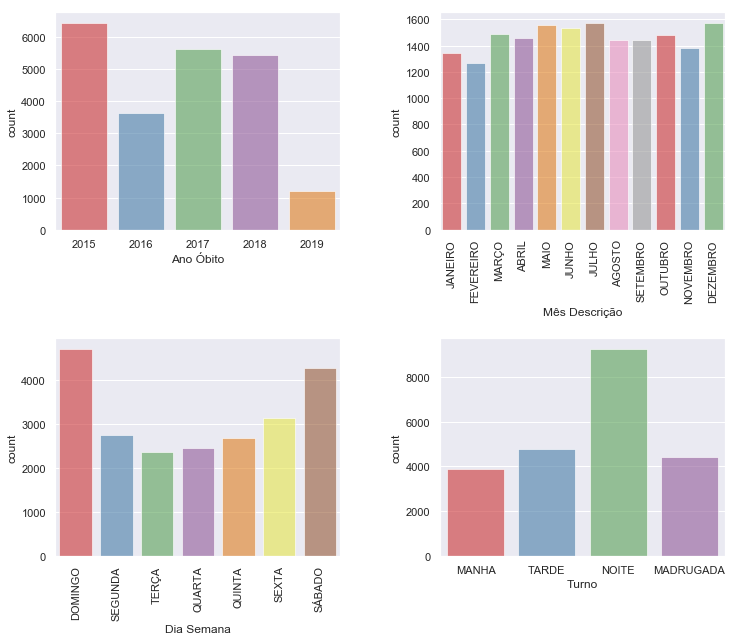

In [75]:
#Gráfico Ano
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.countplot('Ano Óbito', data=base_all_3, alpha = alp, palette=pal3)

#Gráfico Mês (sem 2016 e 2019)
plt.subplot(222)
sns.countplot('Mês Descrição', data=base_all_3[(base_all_3['Ano Óbito']!=(2016)) &
                                               (base_all_3['Ano Óbito']!=(2019))],
              alpha = alp, palette=pal3,         
              order=['JANEIRO', 'FEVEREIRO', 'MARÇO', 'ABRIL', 'MAIO', 'JUNHO', 'JULHO',
             'AGOSTO','SETEMBRO', 'OUTUBRO', 'NOVEMBRO', 'DEZEMBRO'])
plt.xticks(rotation=angulo)

#Gráfico Dia da Semana
plt.subplot(223)
sns.countplot(base_all_3['Dia Semana'], alpha = alp, palette=pal3,
             order=['DOMINGO', 'SEGUNDA', 'TERÇA', 'QUARTA', 'QUINTA', 'SEXTA', 'SÁBADO'])
plt.xticks(rotation=angulo)

#Gráfico Turno
plt.subplot(224)
sns.countplot('Turno', data=base_all_3, alpha = alp, palette=pal3,
             order=['MANHA', 'TARDE', 'NOITE', 'MADRUGADA'])
# plt.xticks(rotation=angulo)

plt.subplots_adjust(hspace=0.5,wspace=0.35)

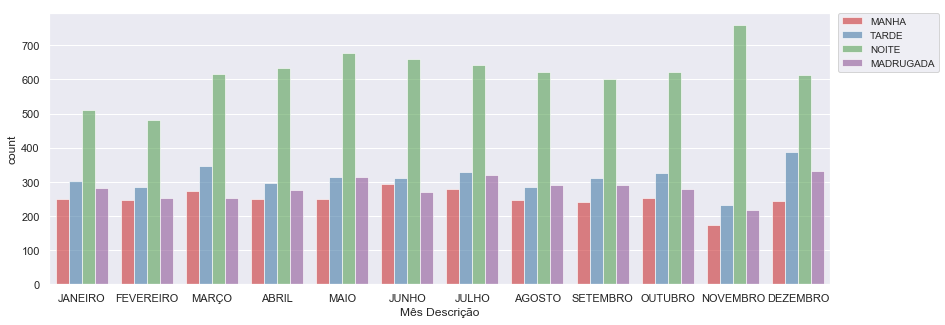

In [76]:
# Meses em relação ao turno - sem os anos de 2016 e 2019
plt.figure(figsize=(14,5))
sns.countplot(x='Mês Descrição', hue= 'Turno', data=base_all_3[(base_all_3['Ano Óbito']!=(2016)) &
                                                       (base_all_3['Ano Óbito']!=(2019))],
              alpha = alp,
              hue_order = ['MANHA', 'TARDE', 'NOITE', 'MADRUGADA'],
              order = ['JANEIRO', 'FEVEREIRO', 'MARÇO', 'ABRIL', 'MAIO', 'JUNHO', 'JULHO',
             'AGOSTO','SETEMBRO', 'OUTUBRO', 'NOVEMBRO', 'DEZEMBRO'],
             palette=pal3)

plt.legend(loc=(1.01,0.78), fontsize=10)

### 1. TEMPO
#### 1.1 MESES em relação às demais variáveis


Text(0.5, 1.0, 'Meses em relação ao dia de semana - sem considerar 2016 e 2019')

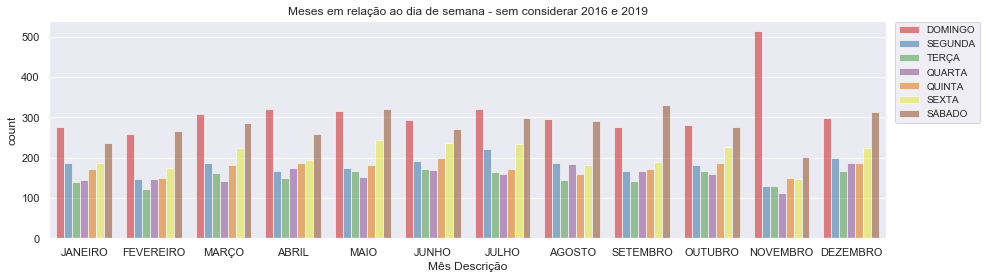

In [77]:
# Meses em relação ao dia de semana - sem considerar 2016 e 2019
# ANÁLISE: o aumento de Novembro nos óbitos de Domingo são resultado dos dados de 2015)

plt.figure(figsize=(15,4))

sns.countplot(x='Mês Descrição', hue= 'Dia Semana', data=base_all_3[(base_all_3['Ano Óbito']!=(2016)) &
                                                       (base_all_3['Ano Óbito']!=(2019))],
              alpha = alp,
              order = ['JANEIRO', 'FEVEREIRO', 'MARÇO', 'ABRIL', 'MAIO', 'JUNHO', 'JULHO',
             'AGOSTO','SETEMBRO', 'OUTUBRO', 'NOVEMBRO', 'DEZEMBRO'],
              hue_order=['DOMINGO', 'SEGUNDA', 'TERÇA', 'QUARTA', 'QUINTA', 'SEXTA', 'SÁBADO'],
              palette=pal3)

plt.legend(loc=(1.01,0.53), fontsize=10)
plt.title('Meses em relação ao dia de semana - sem considerar 2016 e 2019')

Text(0.5, 1.0, 'Meses em relação ao dia de semana - sem considerar 2015, 2016 e 2019')

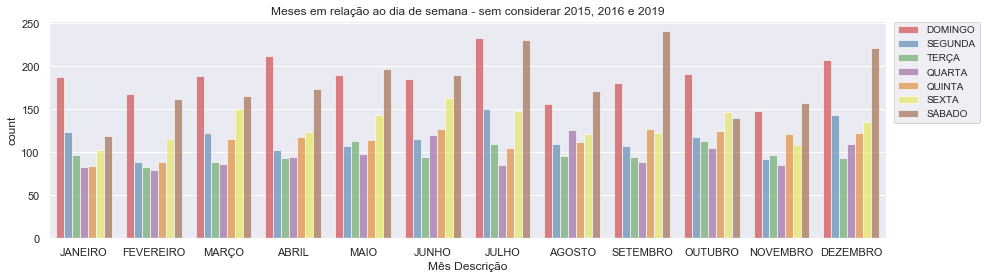

In [78]:
# Meses em relação ao dia de semana - sem considerar 2015, 2016 e 2019
# ANÁLISE: o aumento de Novembro nos óbitos de Domingo são resultado dos dados de 2015)

plt.figure(figsize=(15,4))

sns.countplot(x='Mês Descrição', hue= 'Dia Semana', data=base_all_3[(base_all_3['Ano Óbito']!=(2016)) &
                                                       (base_all_3['Ano Óbito']!=(2019)) &
                                                       (base_all_3['Ano Óbito']!=(2015))],
              alpha = alp,
              order = ['JANEIRO', 'FEVEREIRO', 'MARÇO', 'ABRIL', 'MAIO', 'JUNHO', 'JULHO',
             'AGOSTO','SETEMBRO', 'OUTUBRO', 'NOVEMBRO', 'DEZEMBRO'],
              hue_order=['DOMINGO', 'SEGUNDA', 'TERÇA', 'QUARTA', 'QUINTA', 'SEXTA', 'SÁBADO'],
              palette=pal3)

plt.legend(loc=(1.01,0.53), fontsize=10)
plt.title('Meses em relação ao dia de semana - sem considerar 2015, 2016 e 2019')

Text(0.5, 1.0, 'Meses em relação aos anos')

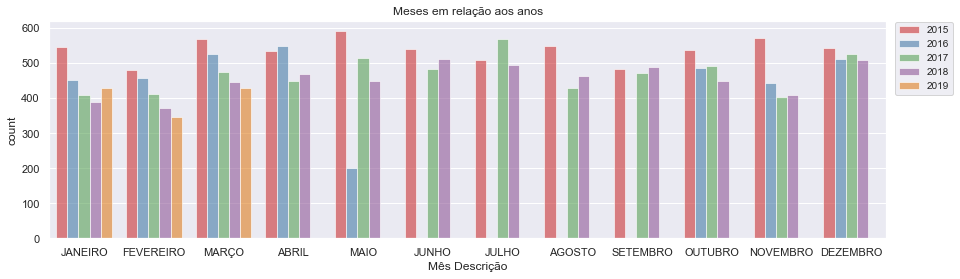

In [79]:
#Olhar detalhe de 2016 - não foi preenchido meses de maio(pouco), junho, julho, agosto, setembro
# e 2019 que ainda não terminou
#Não sei se faz sentido, mas 2016 foi ano de elição municipal, essa época não preenchida correspode à campanha elitoral.

plt.figure(figsize=(15,4))
sns.countplot(x='Mês Descrição', hue= 'Ano Óbito', data=base_all_3, alpha = alp,
             order = ['JANEIRO', 'FEVEREIRO', 'MARÇO', 'ABRIL', 'MAIO', 'JUNHO', 'JULHO',
             'AGOSTO','SETEMBRO', 'OUTUBRO', 'NOVEMBRO', 'DEZEMBRO'],
             palette=pal3)

plt.legend(loc=(1.01,0.66), fontsize=10)
plt.title('Meses em relação aos anos')

Text(0.5, 1.0, 'Meses em relação aos anos - sem considerar 2016')

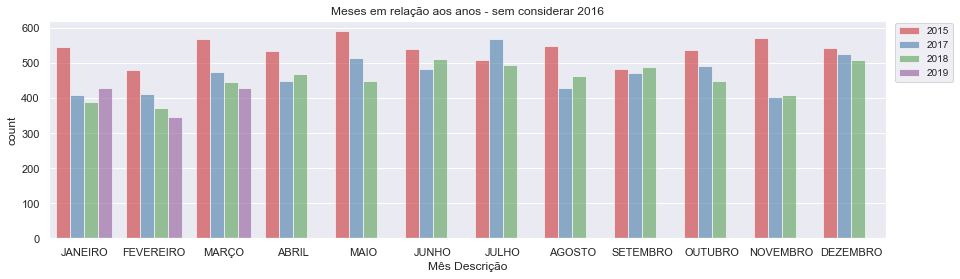

In [80]:
#Se tirar 2016, percebe-se que tem uma queda contínua ao longo dos anos, exceto nos meses de JUNHO, JULHO e SETEMBRO
#Em alguns meses, principalmente em NOVEMBRO, percebe-se um decréscimo alto no número de óbitos de 2015 para os demais anos

plt.figure(figsize=(15,4))
sns.countplot(x='Mês Descrição', hue= 'Ano Óbito', data=base_all_3[(
              base_all_3['Ano Óbito']!=(2016))],
              order = ['JANEIRO', 'FEVEREIRO', 'MARÇO', 'ABRIL', 'MAIO', 'JUNHO', 'JULHO',
             'AGOSTO','SETEMBRO', 'OUTUBRO', 'NOVEMBRO', 'DEZEMBRO'],
             palette=pal3,alpha=alp)

plt.legend(loc=(1.01,0.72), fontsize=10)
plt.title('Meses em relação aos anos - sem considerar 2016')

Text(0.5, 1.0, 'Meses em relação ao sexo - sem considerar 2016 e 2019')

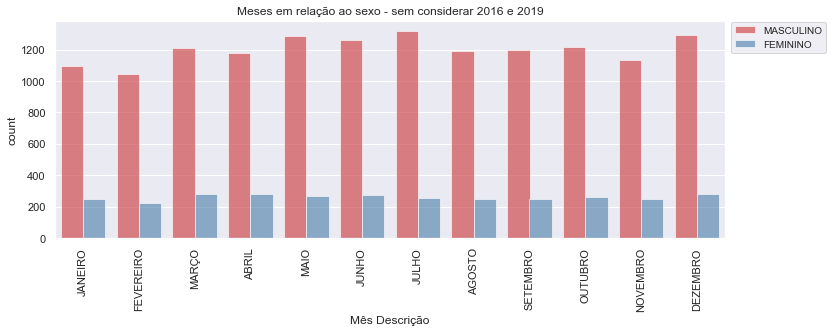

In [81]:
# Meses considerando o sexo - sem anos de 2016 e 2019
# Enquanto nas mulheres existe uam tendência mais contínua (exceto na redução de FEVEREIRO), no caso dos homens existe um pico
#maior de óbitos em JULHO e DEZEMBRO

plt.figure(figsize=(12,4))
sns.countplot(x='Mês Descrição', hue= 'Sexo', data=base_all_3[(base_all_3['Ano Óbito']!=(2016)) &
                                                       (base_all_3['Ano Óbito']!=(2019))],
              order = ['JANEIRO', 'FEVEREIRO', 'MARÇO', 'ABRIL', 'MAIO', 'JUNHO', 'JULHO',
             'AGOSTO','SETEMBRO', 'OUTUBRO', 'NOVEMBRO', 'DEZEMBRO'],
              alpha = alp, palette=pal3)

plt.xticks(rotation=angulo)
plt.legend(loc=(1.01,0.85), fontsize=10)
plt.title('Meses em relação ao sexo - sem considerar 2016 e 2019')

Text(0.5, 1.0, 'Meses em relação ao tipo de via - sem considerar 2016 e 2019')

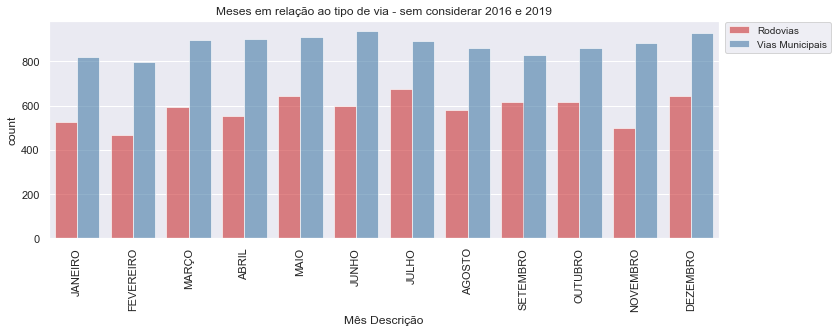

In [82]:
# Meses considerando o tipo de via - sem anos de 2016 e 2019
# O maior índice de mortes nas Rodovias acontece no mês de JULHO e nas Vias Municipais em JUNHO e DEZEMBRO

plt.figure(figsize=(12,4))
sns.countplot(x='Mês Descrição', hue= 'Tipo de Via', data=base_all_3[(base_all_3['Ano Óbito']!=(2016)) &
                                                       (base_all_3['Ano Óbito']!=(2019))],
              order = ['JANEIRO', 'FEVEREIRO', 'MARÇO', 'ABRIL', 'MAIO', 'JUNHO', 'JULHO',
             'AGOSTO','SETEMBRO', 'OUTUBRO', 'NOVEMBRO', 'DEZEMBRO'],
              alpha = alp, palette=pal3)

plt.legend(loc=(1.01,0.85), fontsize=10)
plt.xticks(rotation=angulo)
plt.title('Meses em relação ao tipo de via - sem considerar 2016 e 2019')

Text(0.5, 1.0, 'Meses em relação ao tipo de veículo - sem considerar 2016 e 2019')

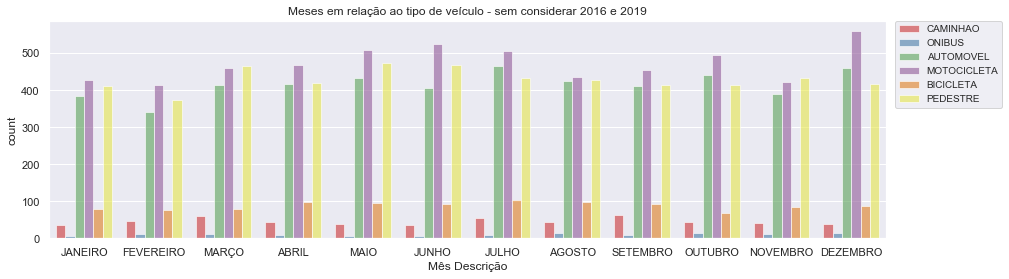

In [83]:
# Meses em relação ao veículo - sem 2016 e 2019
#No caso dos automóveis, existe um pico maior em JULHO e DEZEMBRO
#No caso das motocicletas, o aumento de óbitos é bem mais acentuado em DEZEMBRO
#No caso das bicicletas, existe um aumento entre ABRIL e AGOSTO (talvez pelos meses de férias de inverno - época de menos chuva)
#No caso das motocicletas, existe um aumento acentuado em DEZEMBRO (tavez por ser férias e época de chuvas)
#No caso dos pedestres, existe um aumento entre os meses de MARÇO a JUNHO
#Avaliar a influência do clima no maior ou menor presença dos tipos de veículos/pedestre

plt.figure(figsize=(15,4))
sns.countplot(x='Mês Descrição', hue='Tipo Veiculo', data=base_all_3[(base_all_3['Ano Óbito']!=(2016)) &
                                                       (base_all_3['Ano Óbito']!=(2019))], alpha= alp,
             order=['JANEIRO', 'FEVEREIRO', 'MARÇO', 'ABRIL', 'MAIO', 'JUNHO', 'JULHO',
             'AGOSTO','SETEMBRO', 'OUTUBRO', 'NOVEMBRO', 'DEZEMBRO'],
              hue_order = ['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'],
             palette=pal3)

plt.legend(loc=(1.01,0.60), fontsize=10)
plt.title('Meses em relação ao tipo de veículo - sem considerar 2016 e 2019')

### 1. TEMPO
#### 1.2 DIAS DA SEMANA em relação às demais variáveis


Text(0.5, 1.0, 'Dias da Semana em relação ao sexo')

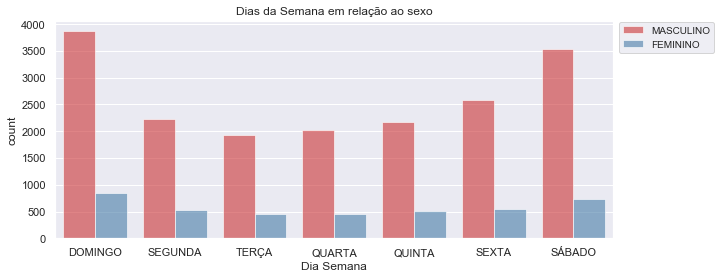

In [84]:
# Dias da semana em relação ao sexo
#O aumento de óbitos nos finais de semana, principalmente DOMINGO é mais acentuado entre os homens

plt.figure(figsize=(10,4))
sns.countplot(x='Dia Semana', hue= 'Sexo', data=base_all_3, alpha = alp, palette=pal3,
             order=['DOMINGO', 'SEGUNDA', 'TERÇA', 'QUARTA', 'QUINTA', 'SEXTA', 'SÁBADO'])

plt.legend(loc=(1.01,0.85), fontsize=10)
plt.title('Dias da Semana em relação ao sexo')

Text(0.5, 1.0, 'Dias da Semana em relação ao turno')

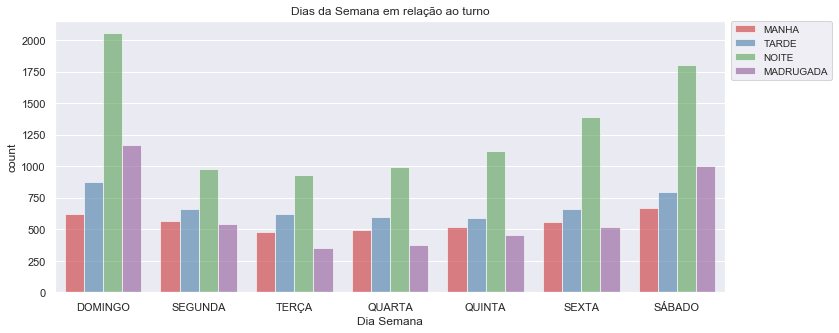

In [85]:
# Dias da semana em relação ao Turno
# Maior aumento de óbitos na noite e madrugada dos fins de semana

plt.figure(figsize=(12,5))
sns.countplot(x='Dia Semana', hue= 'Turno', data=base_all_3, alpha = alp, palette=pal3,
             order=['DOMINGO', 'SEGUNDA', 'TERÇA', 'QUARTA', 'QUINTA', 'SEXTA', 'SÁBADO'],
             hue_order=['MANHA', 'TARDE', 'NOITE', 'MADRUGADA'])

plt.legend(loc=(1.01,0.78), fontsize=10)
plt.title('Dias da Semana em relação ao turno')

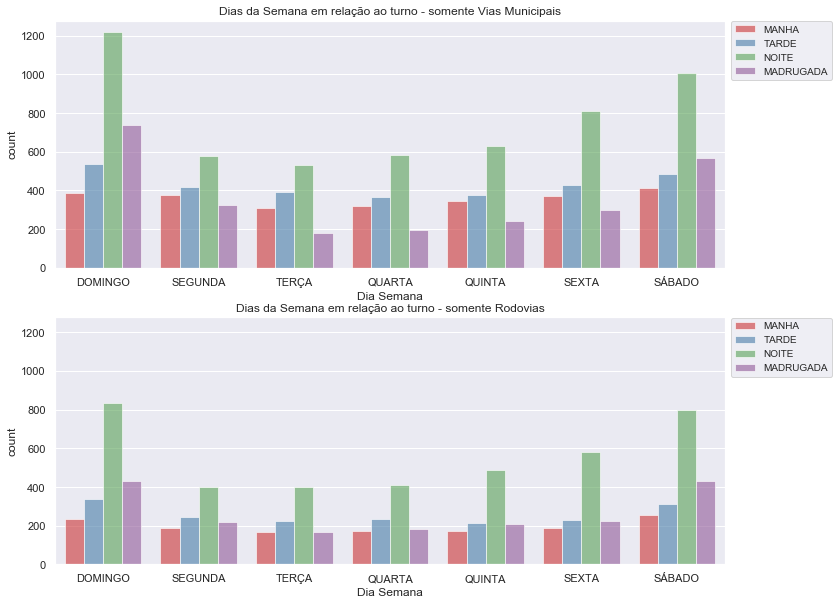

In [86]:
# Dias da semana em relação ao Turno
# Maior aumento de óbitos na noite e madrugada dos fins de semana
# Entender se essa tendência se repete nas Vias Municipais e nas Rodovias
#Nas Vias Municipais, o aumento do óbitos na noite e madrugada de DOMINGO são mais acentuados do que no SÁBADO
#Nas Rodovias, o aumento de óbitos na noite e madrugada do SÁBADO e DOMINGO têm praticamente o mesmo valor

plt.figure(figsize=(12,10))

#Somente Vias Municipais
plt.subplot(211)
ax1 = sns.countplot(x='Dia Semana', hue= 'Turno', data=base_all_3.loc[
                                            base_all_3['Tipo de Via'].str.contains('Rodovias')==False],
             alpha = alp, palette=pal3,
             order=['DOMINGO', 'SEGUNDA', 'TERÇA', 'QUARTA', 'QUINTA', 'SEXTA', 'SÁBADO'],
             hue_order=['MANHA', 'TARDE', 'NOITE', 'MADRUGADA'])
plt.title('Dias da Semana em relação ao turno - somente Vias Municipais')
plt.legend(loc=(1.01,0.76), fontsize=10)

#Somente Rodovias
plt.subplot(212, sharey=ax1)
ax2 = sns.countplot(x='Dia Semana', hue= 'Turno', data=base_all_3.loc[
                                            base_all_3['Tipo de Via'].str.contains('Rodovias')==True],
             alpha = alp, palette=pal3,
             order=['DOMINGO', 'SEGUNDA', 'TERÇA', 'QUARTA', 'QUINTA', 'SEXTA', 'SÁBADO'],
             hue_order=['MANHA', 'TARDE', 'NOITE', 'MADRUGADA'])
plt.title('Dias da Semana em relação ao turno - somente Rodovias')
plt.legend(loc=(1.01,0.76), fontsize=10)


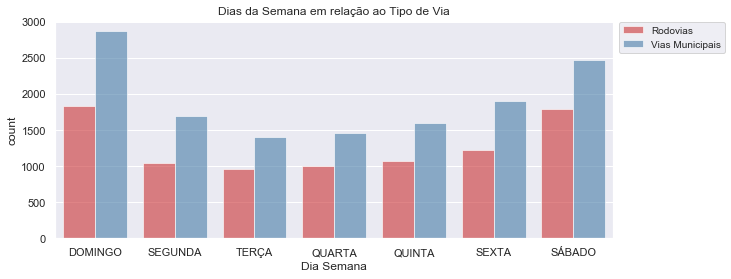

In [87]:
# Dias da semana em relação ao Tipo de Via
#Os dados anteriores são confirmados nesse gráfico em que o número de óbitos nas Rodovias no SABADO e DOMINGO são parecidos
#enquanto que nas Vias mnicipais o valor de óbitos no DOMINGO é maior

plt.figure(figsize=(10,4))
sns.countplot(x='Dia Semana', hue= 'Tipo de Via', data=base_all_3, alpha = alp, palette=pal3,
             order=['DOMINGO', 'SEGUNDA', 'TERÇA', 'QUARTA', 'QUINTA', 'SEXTA', 'SÁBADO'])

plt.title('Dias da Semana em relação ao Tipo de Via')
plt.legend(loc=(1.01,0.85), fontsize=10)

Text(0.5, 1.0, 'Dias da Semana em relação ao Tipo de Veículo')

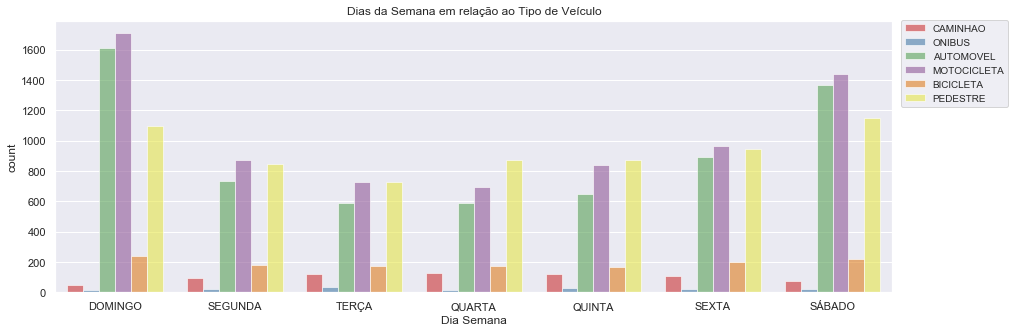

In [88]:
# Dias da semana em relação ao Tipo de Veículo
# Nos finais de semana o aumento de óbito ocorre principalmente por motocicletas e automóveis
# Existe um aumento de pedestres também nos finais de semana.
# Durante a semana SEGUNDA e SEXTA são dias que merecem atenção pelo aumento de óbitos comparados aos demais dias úteis

plt.figure(figsize=(15,5))
sns.countplot(x='Dia Semana', hue= 'Tipo Veiculo', data=base_all_3, alpha = alp, palette=pal3,
             order=['DOMINGO', 'SEGUNDA', 'TERÇA', 'QUARTA', 'QUINTA', 'SEXTA', 'SÁBADO'],
             hue_order = ['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'])

plt.legend(loc=(1.01,0.68), fontsize=10)
plt.title('Dias da Semana em relação ao Tipo de Veículo')

Text(0.5, 1.0, 'Dias da Semana em relação ao Tipo de Veículo - Somente Rodovias')

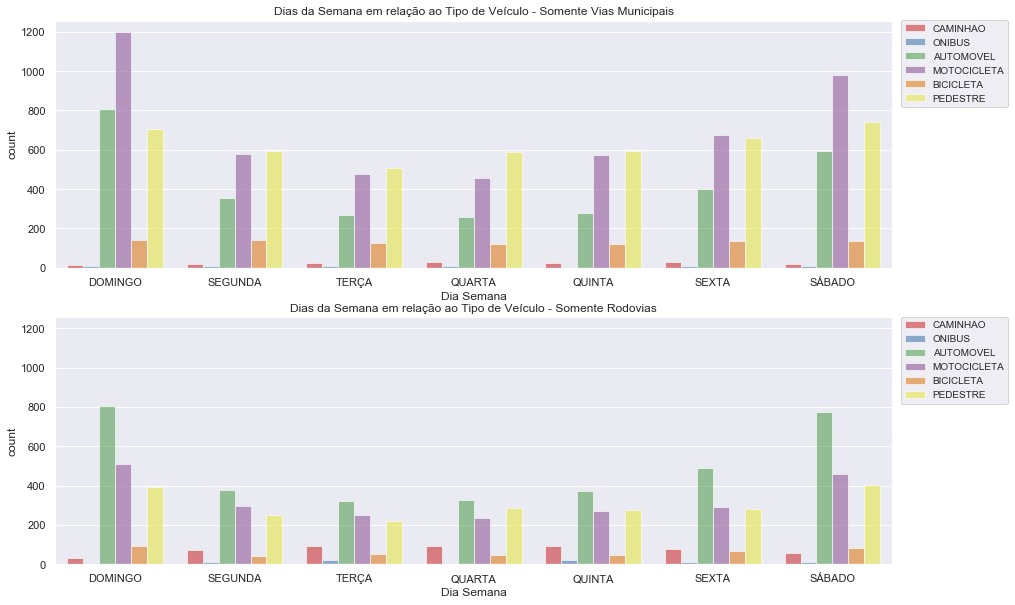

In [89]:
# Dias da semana em relação ao Tipo de Veículo
# Nos finais de semana o aumento de óbito ocorre principalmente por automóveis e motocicletas
# Entender se essa tendência se repete nas Vias Municipais e nas Rodovias

#Nas Vias Municipais o aumento de óbitos nos finais de semana é devido mais aos acidentes de motocicletas do que automóveis
#Nas Rodovias, os automóveis são os principais motivos de óbitos nos finais de semana.
#Tanto nas Rodovias como nas Vias Municipais, existe um aumento de pedestres também nos finais de semana.
#Detalhe para quarta feira nas quartas feiras tanto nas Rodovias e Vias Municipais, em que o índice de óbitos de pedestres
#é maior do que de motocicletas. Sendo que nas Vias Municipais o Pedestre é a principal vítima entre os outros tipos de veículos

plt.figure(figsize=(15,10))

#Somente Vias Municipais
plt.subplot(211)
ax1 = sns.countplot(x='Dia Semana', hue= 'Tipo Veiculo', data=base_all_3.loc[
                                            base_all_3['Tipo de Via'].str.contains('Rodovias')==False],
                    alpha = alp, palette=pal3,
                    order=['DOMINGO', 'SEGUNDA', 'TERÇA', 'QUARTA', 'QUINTA', 'SEXTA', 'SÁBADO'],
                    hue_order = ['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'])

plt.legend(loc=(1.01,0.65), fontsize=10)
plt.title('Dias da Semana em relação ao Tipo de Veículo - Somente Vias Municipais')

#Somente Rodovias
plt.subplot(212, sharey=ax1)
ax2 = sns.countplot(x='Dia Semana', hue= 'Tipo Veiculo', data=base_all_3.loc[
                                            base_all_3['Tipo de Via'].str.contains('Rodovias')==True],
                    alpha = alp, palette=pal3,
                    order=['DOMINGO', 'SEGUNDA', 'TERÇA', 'QUARTA', 'QUINTA', 'SEXTA', 'SÁBADO'],
                    hue_order = ['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'])

plt.legend(loc=(1.01,0.65), fontsize=10)
plt.title('Dias da Semana em relação ao Tipo de Veículo - Somente Rodovias')

### 1. TEMPO
#### 1.3 TURNO em relação às demais variáveis


Text(0.5, 1.0, 'Turno em relaçao ao Sexo')

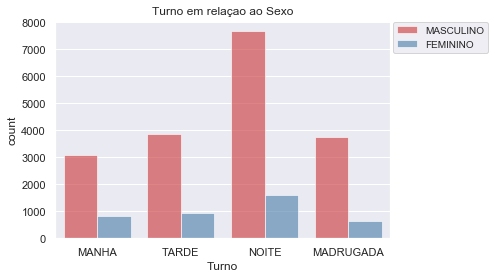

In [90]:
# Turno em relação ao Sexo
#Ambos os sexos tem um aumento de óbitos no período na NOITE, sendo que entre os homens o aumento é bem mais acentuado.
#Entre os homens o período com menos óbitos é o da MANHA. Entre as mulheres o menor índice de óbitos acontece de MADRUGADA


plt.figure(figsize=(6,4))
sns.countplot(x='Turno', hue= 'Sexo', data=base_all_3, alpha = alp, palette=pal3,
             order=['MANHA', 'TARDE', 'NOITE', 'MADRUGADA'])

plt.legend(loc=(1.01,0.85), fontsize=10)
plt.title('Turno em relaçao ao Sexo')

Text(0.5, 1.0, 'Turno em relaçao ao Tipo de Via')

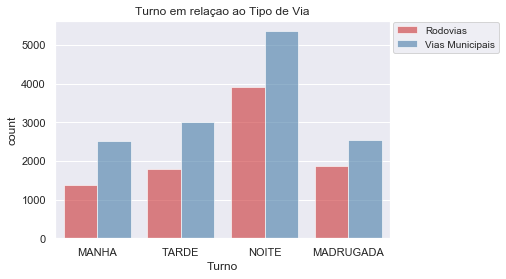

In [91]:
# Turno em relação ao Tipo de Via
# Tarde e noite são os perídos que mais ocorrem os óbitos nas Vias Municipais, e noite e madrugada no caso das Rodovias
# Existe um pico na NOITE em ambos os tipos de via.
 
plt.figure(figsize=(6,4))
sns.countplot(x='Turno', hue= 'Tipo de Via', data=base_all_3, alpha = alp, palette=pal3,
             order=['MANHA', 'TARDE', 'NOITE', 'MADRUGADA'])

plt.legend(loc=(1.01,0.85), fontsize=10)
plt.title('Turno em relaçao ao Tipo de Via')

Text(0.5, 1.0, 'Turno em relação ao Tipo de Acidente - Somente Rodovias')

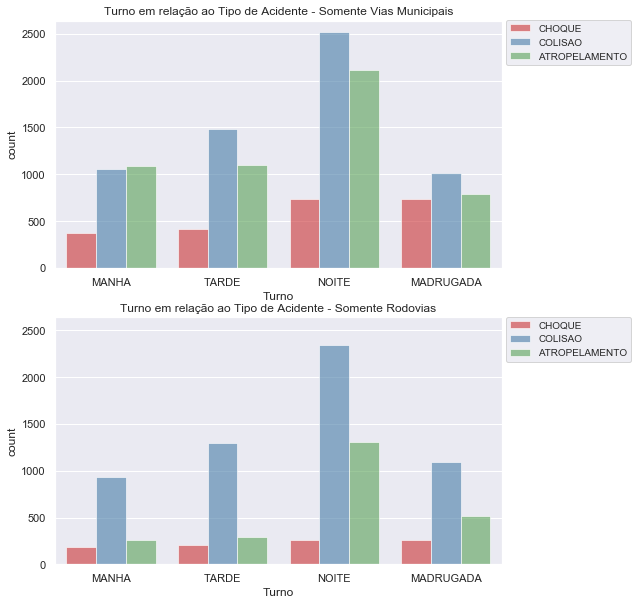

In [92]:
# Turno em relação ao Tipo de Acidente
#Entender se existe difernça entre os números nas Rodovias e Vias Municipais
#A colisão é o principal motivo de óbitos tanto nas Vias Municipais e Rodovias, sendo NOITE e TARDE em ambos os casos
#Nas Vias Muncipais os atropelamentos acontecem principalmente à NOITE, seguido de MANHÃ e TARDE na mesma proporção
#Nas Rodovias os atropelamentos estão concentrados à NOITE, seguido da MADRUGADA em menor proporção
#O número de óbitos por choque nas Vias Municipais aumentam no período da NOITE e MADRUGADA, o que não ocorre nas Rodovias

plt.figure(figsize=(8,10))

#Somente Vias Municipais
plt.subplot(211)
ax1 = sns.countplot(x='Turno', hue= 'Tipo Acidente', data=base_all_3.loc[
             base_all_3['Tipo de Via'].str.contains('Rodovias')==False], alpha = alp, palette=pal3,
             order=['MANHA', 'TARDE', 'NOITE', 'MADRUGADA'],
             hue_order=['CHOQUE','COLISAO','ATROPELAMENTO'])

plt.legend(loc=(1.01,0.82), fontsize=10)
plt.title('Turno em relação ao Tipo de Acidente - Somente Vias Municipais')

#Somente Rodovias
plt.subplot(212, sharey=ax1)
ax2 = sns.countplot(x='Turno', hue= 'Tipo Acidente', data=base_all_3.loc[
             base_all_3['Tipo de Via'].str.contains('Rodovias')==True], alpha = alp, palette=pal3,
             order=['MANHA', 'TARDE', 'NOITE', 'MADRUGADA'],
             hue_order=['CHOQUE','COLISAO','ATROPELAMENTO'])

plt.legend(loc=(1.01,0.82), fontsize=10)
plt.title('Turno em relação ao Tipo de Acidente - Somente Rodovias')

Text(0.5, 1.0, 'Turno em relação ao Tipo de Veículo - Somente Rodovias')

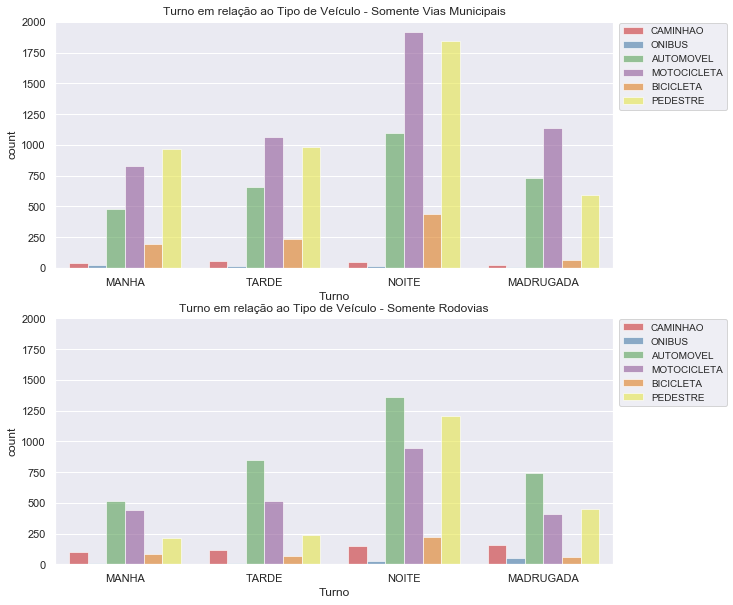

In [93]:
# Turno em relação ao Tipo de Veículo
#Entender se existe difernça entre os números nas Rodovias e Vias Municipais
#Nas Vias Municipais os principais óbitos são as vítimas em motocicletas e os pedestres no período da NOITE
#No caso das Rodovias são os automóveis e pedestres no perído da NOITE

plt.figure(figsize=(10,10))

#Somente Vias Municipais
plt.subplot(211)
ax1 = sns.countplot(x='Turno', hue= 'Tipo Veiculo', data=base_all_3.loc[
             base_all_3['Tipo de Via'].str.contains('Rodovias')==False], alpha = alp, palette=pal3,
             order=['MANHA', 'TARDE', 'NOITE', 'MADRUGADA'],
             hue_order=['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'])

plt.legend(loc=(1.01,0.64), fontsize=10)
plt.title('Turno em relação ao Tipo de Veículo - Somente Vias Municipais')

#Somente Rodovias
plt.subplot(212, sharey=ax1)
ax2 = sns.countplot(x='Turno', hue= 'Tipo Veiculo', data=base_all_3.loc[
             base_all_3['Tipo de Via'].str.contains('Rodovias')==True], alpha = alp, palette=pal3,
             order=['MANHA', 'TARDE', 'NOITE', 'MADRUGADA'],
             hue_order=['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'])

plt.legend(loc=(1.01,0.64), fontsize=10)
plt.title('Turno em relação ao Tipo de Veículo - Somente Rodovias')

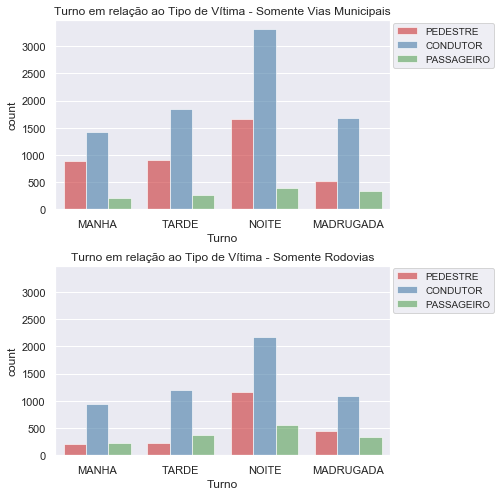

In [94]:
# Turno em relação ao Tipo de Vítima
#Entender se existe difernça entre os números nas Rodovias e Vias Municipais
#Considerando o período ne mais óbitos - NOITE - Nas Vias Municipais a principal vítima é o próprio condutor
#Nas rodovias existe um aumento em relação ao passageiro. Isso ocorre principalmente pelo tipo de veículo:
#MOTOCICLETAS - somente o condutor | AUTOMÓVEL - condutor e passageiro

plt.figure(figsize=(6,8))

#Somente Vias Municipais
plt.subplot(211)
ax1 = sns.countplot(x='Turno', hue= 'Tipo Vítima', data=base_all_3.loc[
             base_all_3['Tipo de Via'].str.contains('Rodovias')==False], alpha = alp, palette=pal3,
             order=['MANHA', 'TARDE', 'NOITE', 'MADRUGADA'],
             hue_order=['PEDESTRE','CONDUTOR','PASSAGEIRO'])

plt.legend(loc=(1.01,0.75), fontsize=10)
plt.title('Turno em relação ao Tipo de Vítima - Somente Vias Municipais')

#Somente Rodovias
plt.subplot(212, sharey=ax1)
ax2 = sns.countplot(x='Turno', hue= 'Tipo Vítima', data=base_all_3.loc[
             base_all_3['Tipo de Via'].str.contains('Rodovias')==True], alpha = alp, palette=pal3,
             order=['MANHA', 'TARDE', 'NOITE', 'MADRUGADA'],
             hue_order=['PEDESTRE','CONDUTOR','PASSAGEIRO'])

plt.legend(loc=(1.01,0.75), fontsize=10)
plt.title('Turno em relação ao Tipo de Vítima - Somente Rodovias')

plt.subplots_adjust(hspace=0.3,wspace=0.35)

Text(0.5, 1.0, 'Turno em relação a presença de outro veículo envolvido no óbito')

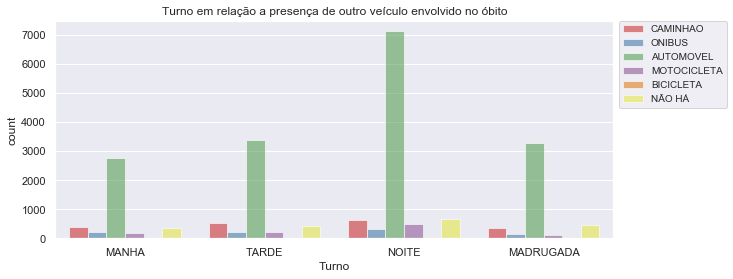

In [95]:
# Turno em relação a presença de Outro Viículo Envolvido
# Em todos os horários do dia existem mais AUTOMÓVEIS envolvidos nos acidentes que ocasionaram o óbito
# Entender se existe difernça entre os números nas Rodovias e Vias Municipais

plt.figure(figsize=(10,4))
sns.countplot(x='Turno', hue= 'Outro Veículo Envolvido', data=base_all_3, alpha = alp, palette=pal3,
             order=['MANHA', 'TARDE', 'NOITE', 'MADRUGADA'],
             hue_order=['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'NÃO HÁ'])

plt.legend(loc=(1.01,0.60), fontsize=10)
plt.title('Turno em relação a presença de outro veículo envolvido no óbito')

Text(0.5, 1.0, 'Turno em relação a presença de outro veículo envolvido no óbito - Somente Rodovias')

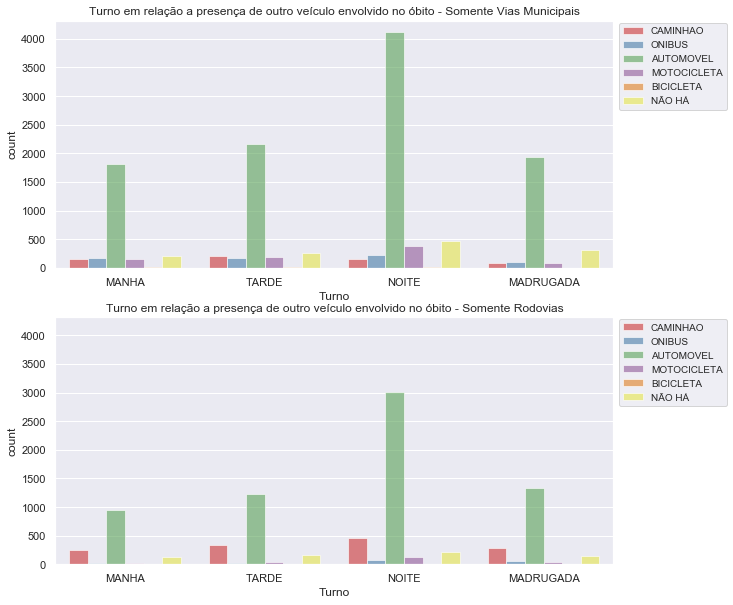

In [96]:
# Turno em relação a presença de Outro Viículo Envolvido

#Entender se existe difernça entre os números nas Rodovias e Vias Municipais
#O maior índice continua sendo de AUTOMÓVEIS, mas nas Vias Municipais, existe um aumento de motocicletas o que poderia ser 
#redução de visibilidade. Existe um aumento de óbitos por não haver nenhum outro veículo envolvido, pelo mesmo motivo anterior
#Nas Rodovias existe um aumento de caminhões envolvidos nos acidentes no período da noite. O índice de motocicetas envolvidas
# nos acidentes das Rodovias é bem pequeno

plt.figure(figsize=(10,10))

#Somente Vias Municipais
plt.subplot(211)
ax1 = sns.countplot(x='Turno', hue= 'Outro Veículo Envolvido', data=base_all_3.loc[
             base_all_3['Tipo de Via'].str.contains('Rodovias')==False], alpha = alp, palette=pal3,
             order=['MANHA', 'TARDE', 'NOITE', 'MADRUGADA'],
             hue_order=['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'NÃO HÁ'])

plt.legend(loc=(1.01,0.64), fontsize=10)
plt.title('Turno em relação a presença de outro veículo envolvido no óbito - Somente Vias Municipais')

#Somente Rodovias
plt.subplot(212, sharey=ax1)
ax2 = sns.countplot(x='Turno', hue= 'Outro Veículo Envolvido', data=base_all_3.loc[
             base_all_3['Tipo de Via'].str.contains('Rodovias')==True], alpha = alp, palette=pal3,
             order=['MANHA', 'TARDE', 'NOITE', 'MADRUGADA'],
             hue_order=['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'NÃO HÁ'])

plt.legend(loc=(1.01,0.64), fontsize=10)
plt.title('Turno em relação a presença de outro veículo envolvido no óbito - Somente Rodovias')

### 2. CARACTERÍSTICA DA VÍTIMA
#### 2.1 IDADE em relação às demais variáveis

Text(0.5, 1.0, 'Idade em relação ao Sexo')

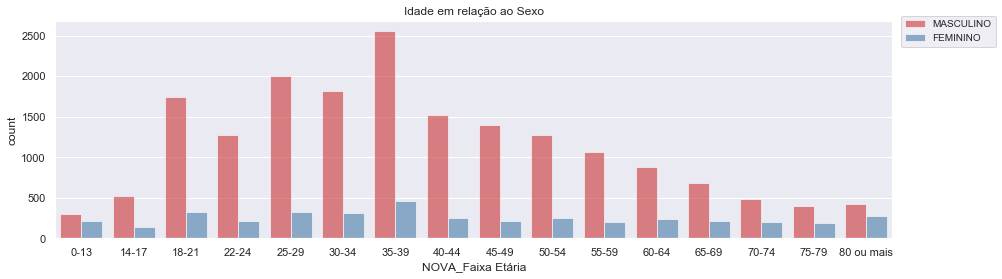

In [97]:
#Idade em relação ao Sexo
#Usando faixa etária NOVA - com novas categorias
# Existem dois principais picos 18-21 e 35-39 - por motivos de acidente diferentes (Olhar mais para frente)

plt.figure(figsize=(15,4))
sns.countplot(x='NOVA_Faixa Etária', hue= 'Sexo', data=base_all_3, alpha = alp, palette=pal3,
             order = ['0-13','14-17','18-21','22-24','25-29','30-34','35-39','40-44',
                      '45-49','50-54','55-59','60-64','65-69','70-74','75-79', '80 ou mais'])

plt.legend(loc=(1.01,0.88), fontsize=10)
plt.title('Idade em relação ao Sexo')

Text(0.5, 1.0, 'Idade em relação ao Sexo')

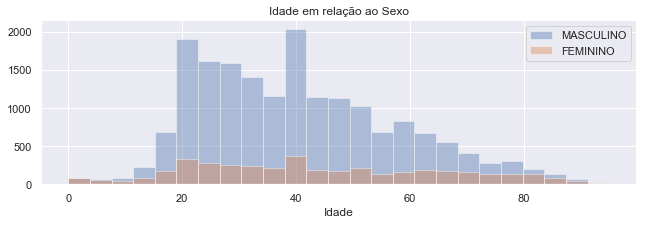

In [98]:
# Idade em relação ao sexo
#O pico dos 18-20 anos acontece mais com o sexo masculino e o pico de 35-40 acontece em ambos

a = sns.FacetGrid(base_all_3, hue='Sexo', aspect=3)
a.map(sns.distplot, 'Idade', bins=25, kde=False)
plt.legend()
plt.title('Idade em relação ao Sexo')

Text(0.5, 1.0, 'Cidade de São Paulo')

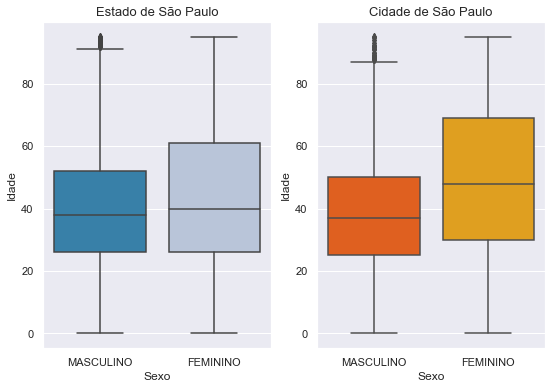

In [99]:
#Boxplot da Idade em relação ao sexo - Separando o Estado da Capital
# A média de idade das mulheres é um pouco maior na cidade de São Paulo do que a média do Estado; sendo que
# na cidade de São Paulo, mediana dos 25% mais novo é em torno dos 25 para homens e 30 para mulheres

dims = (9, 6)

fig, [ax1, ax2] = plt.subplots(1,2, figsize=dims)
sns.boxplot(x='Sexo', y='Idade', data=base_all_3,  ax=ax1, palette='PuBu_r')
sns.boxplot(x='Sexo', y='Idade', data=base_sp,  ax=ax2, palette='autumn')

ax1.set_title('Estado de São Paulo', size=titsz)
ax2.set_title('Cidade de São Paulo', size=titsz)

Text(0.5, 1.0, 'Cidade de São Paulo')

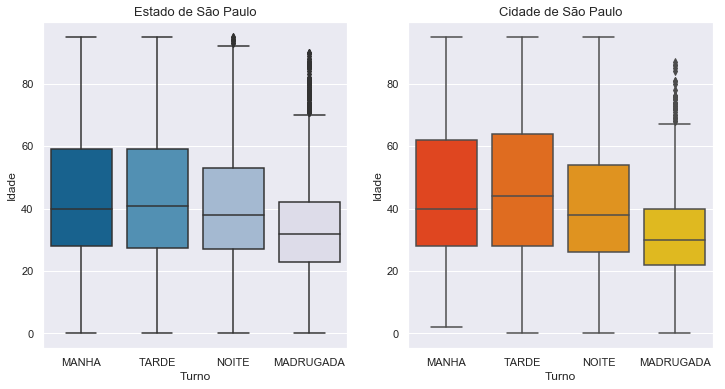

In [100]:
#Boxplot da Idade - em relação ao turno
#Durante a madrugada em ambos os casos, a média de idade é bem menor do que os demais períodos do dia.

dims = (12, 6)

fig, [ax1, ax2] = plt.subplots(1,2, figsize=dims)
sns.boxplot(x='Turno', y='Idade', data=base_all_3,  ax=ax1, palette='PuBu_r',
           order=['MANHA', 'TARDE', 'NOITE', 'MADRUGADA'])
sns.boxplot(x='Turno', y='Idade', data=base_sp,  ax=ax2, palette='autumn',
           order=['MANHA', 'TARDE', 'NOITE', 'MADRUGADA'])

ax1.set_title('Estado de São Paulo', size=titsz)
ax2.set_title('Cidade de São Paulo', size=titsz)

Text(0.5, 1.0, 'Cidade de São Paulo')

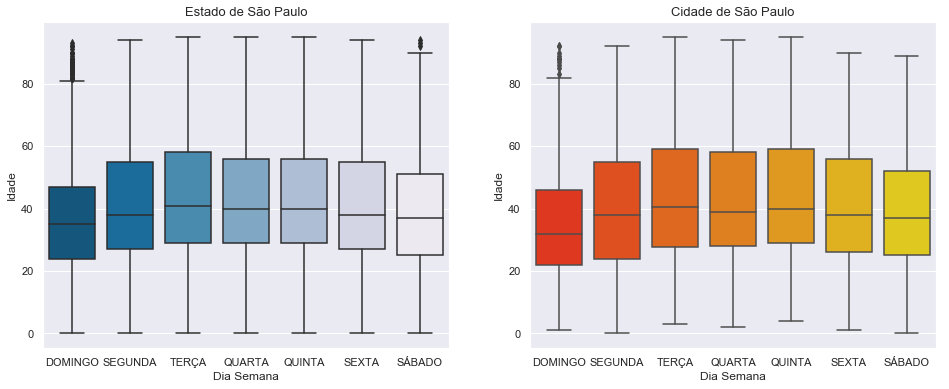

In [101]:
#Boxplot da Idade - em relação ao dia da semana
#DOMINGO é o dia da semana em que as vítimas são mais novas - mediana de cerca de 35 anos - sendo que nos outros dias a 
#mediana é de cerca de 40 anos

dims = (16, 6)

fig, [ax1, ax2] = plt.subplots(1,2, figsize=dims)
sns.boxplot(x='Dia Semana', y='Idade', data=base_all_3,  ax=ax1, palette='PuBu_r',
           order=['DOMINGO', 'SEGUNDA', 'TERÇA', 'QUARTA', 'QUINTA', 'SEXTA', 'SÁBADO'])
sns.boxplot(x='Dia Semana', y='Idade', data=base_sp,  ax=ax2, palette='autumn',
           order=['DOMINGO', 'SEGUNDA', 'TERÇA', 'QUARTA', 'QUINTA', 'SEXTA', 'SÁBADO'])

ax1.set_title('Estado de São Paulo', size=titsz)
ax2.set_title('Cidade de São Paulo', size=titsz)

Text(0.5, 1.0, 'Cidade de São Paulo')

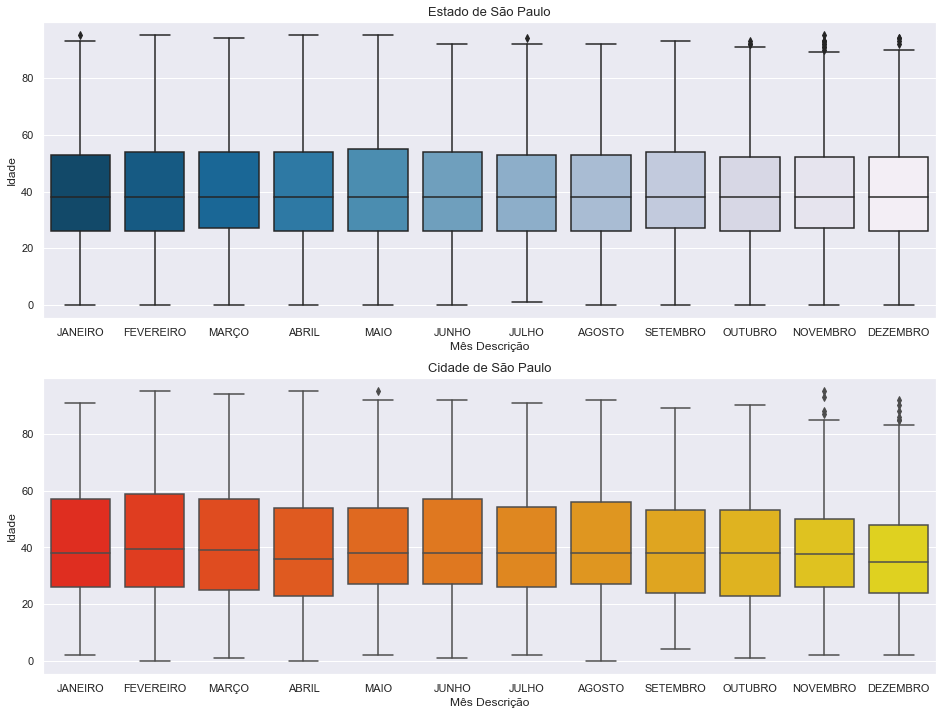

In [102]:
#Boxplot da Idade - em relação ao mês
#As médias de idade das vítimas não muda muito no Esatdo de São Paulo
#Na capital destaque para os meses de NOVEMBRO e DEZEMBRO, em que 75% das vítimas estão abaixo dos 50 anos
#enquanto nos demais meses essa faixa de idade está em cerca de 55 a 60 anos.

dims = (16, 12)

fig, [ax1, ax2] = plt.subplots(2,1, figsize=dims)
sns.boxplot(x='Mês Descrição', y='Idade', data=base_all_3,  ax=ax1, palette='PuBu_r',
           order=['JANEIRO', 'FEVEREIRO', 'MARÇO', 'ABRIL', 'MAIO', 'JUNHO', 'JULHO',
             'AGOSTO','SETEMBRO', 'OUTUBRO', 'NOVEMBRO', 'DEZEMBRO'])
sns.boxplot(x='Mês Descrição', y='Idade', data=base_sp,  ax=ax2, palette='autumn',
           order=['JANEIRO', 'FEVEREIRO', 'MARÇO', 'ABRIL', 'MAIO', 'JUNHO', 'JULHO',
             'AGOSTO','SETEMBRO', 'OUTUBRO', 'NOVEMBRO', 'DEZEMBRO'])

ax1.set_title('Estado de São Paulo', size=titsz)
ax2.set_title('Cidade de São Paulo', size=titsz)

Text(0.5, 1.0, 'Cidade de São Paulo')

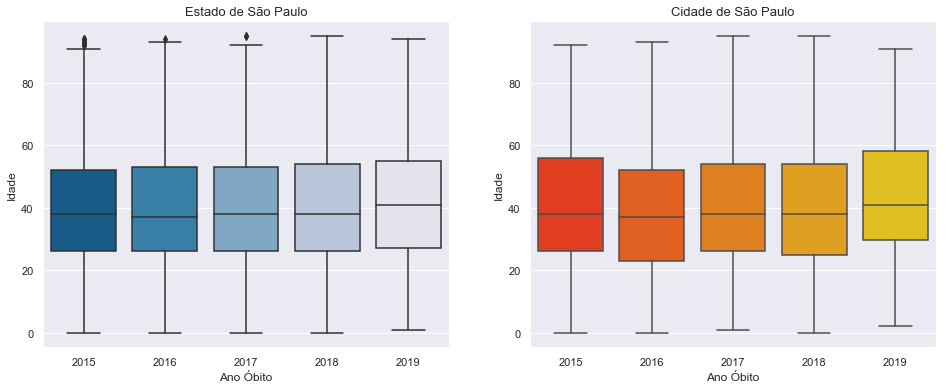

In [103]:
#Boxplot da Idade - em relação ao ano
#As idades das vítimas do Estado de São Paulo não variou muito em relação aos anos - 75% entre os 55 anos

dims = (16, 6)

fig, [ax1, ax2] = plt.subplots(1,2, figsize=dims)
sns.boxplot(x='Ano Óbito', y='Idade', data=base_all_3,  ax=ax1, palette='PuBu_r',
           )
sns.boxplot(x='Ano Óbito', y='Idade', data=base_sp,  ax=ax2, palette='autumn'
           )

ax1.set_title('Estado de São Paulo', size=titsz)
ax2.set_title('Cidade de São Paulo', size=titsz)

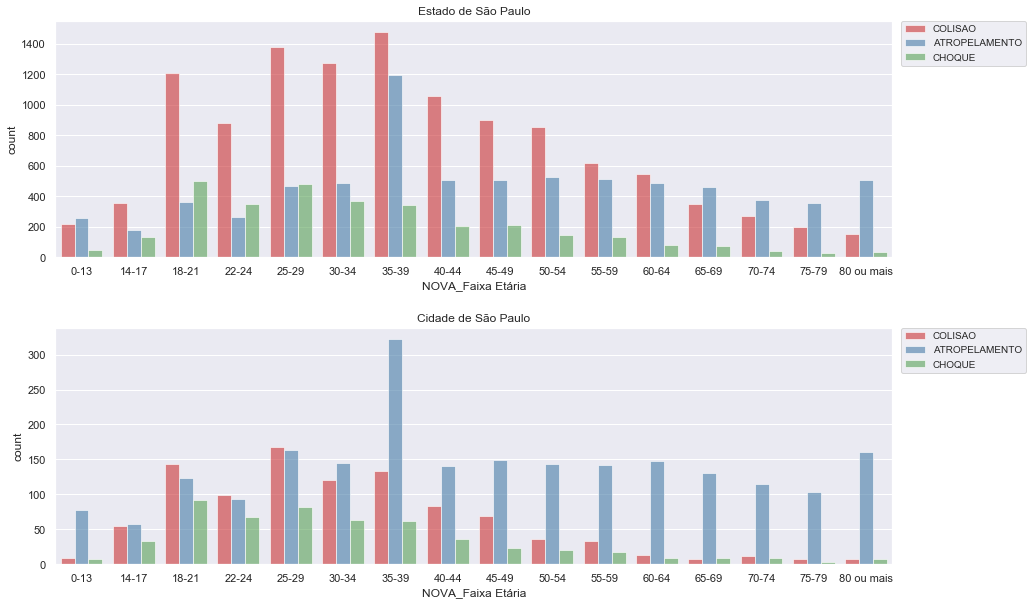

In [104]:
# Tipo de acidente pela faixa etária- Separando a capital do estado
plt.figure(figsize=(15,10))

#ESTADO SP - sem a capital
plt.subplot(211)
sns.countplot(x='NOVA_Faixa Etária', hue= 'Tipo Acidente', data=base_all_3,
             order = ['0-13','14-17','18-21','22-24','25-29','30-34','35-39','40-44',
                      '45-49','50-54','55-59','60-64','65-69','70-74','75-79', '80 ou mais'], alpha = alp, palette=pal3)
plt.title('Estado de São Paulo')
plt.legend(loc=(1.01,0.81), fontsize=10)

#CIDADE SP
plt.subplot(212)
sns.countplot(x='NOVA_Faixa Etária', hue= 'Tipo Acidente', data=base_sp,
             order = ['0-13','14-17','18-21','22-24','25-29','30-34','35-39','40-44',
                      '45-49','50-54','55-59','60-64','65-69','70-74','75-79', '80 ou mais'], alpha = alp, palette=pal3)
plt.title('Cidade de São Paulo')
plt.legend(loc=(1.01,0.81), fontsize=10)

plt.subplots_adjust(hspace=0.3,wspace=0.35)

Text(0.5, 1.0, 'Cidade de São Paulo')

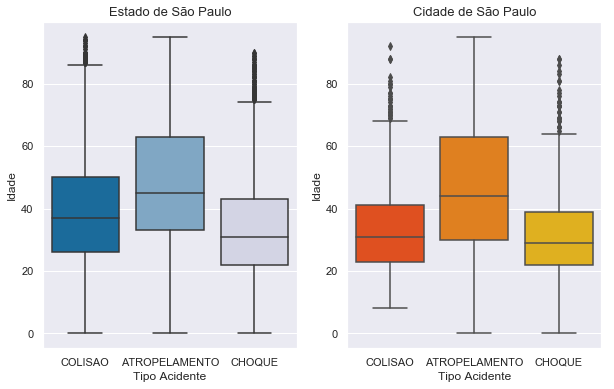

In [105]:
#Boxplot da Idade - em relação ao tipo de acidente
# A faixa de idade de óbitos por atropelamento é bem maior do que de Choque ou colisão - 75% dos casos com até cerca de 60 anos
#Na Capital, as vítimas por Colisão e choque tem idades menores do que no estado - sendo os 75% dos casos com até
#cerca de 40 anos

dims = (10, 6)

fig, [ax1, ax2] = plt.subplots(1,2, figsize=dims)
sns.boxplot(x='Tipo Acidente', y='Idade', data=base_all_3,  ax=ax1, palette='PuBu_r')
sns.boxplot(x='Tipo Acidente', y='Idade', data=base_sp,  ax=ax2, palette='autumn')

ax1.set_title('Estado de São Paulo', size=titsz)
ax2.set_title('Cidade de São Paulo', size=titsz)

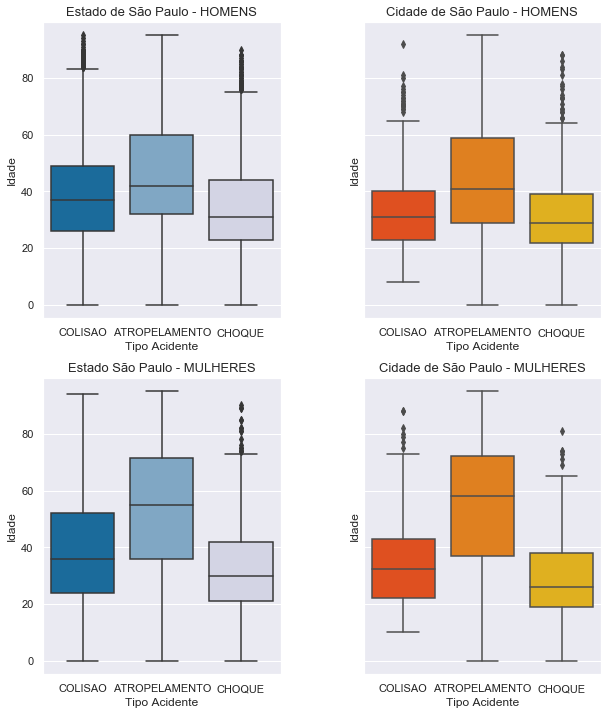

In [106]:
#Boxplot da Idade - em relação ao tipo de acidente - Separando Homens e Mulheres
# A separar homens e mulheres a principal diferença está nas vítimas de ATROPELAMENTO, que possuem idades maiores no caso
# das mulheres, sendo maior na Capital

dims = (10, 12)

fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2, figsize=dims, sharey=True)
sns.boxplot(x='Tipo Acidente', y='Idade', data=base_all_3.loc[(
            base_all_3['Sexo'].str.contains('MASCULINO') == True)],  ax=ax1, palette='PuBu_r',
           order = ['COLISAO', 'ATROPELAMENTO', 'CHOQUE'])

sns.boxplot(x='Tipo Acidente', y='Idade', data=base_sp.loc[(
            base_sp['Sexo'].str.contains('MASCULINO') == True)],  ax=ax2, palette='autumn',
           order = ['COLISAO', 'ATROPELAMENTO', 'CHOQUE'])

sns.boxplot(x='Tipo Acidente', y='Idade', data=base_all_3.loc[(
            base_all_3['Sexo'].str.contains('MASCULINO') == False)],  ax=ax3, palette='PuBu_r',
           order = ['COLISAO', 'ATROPELAMENTO', 'CHOQUE'])

sns.boxplot(x='Tipo Acidente', y='Idade', data=base_sp.loc[(
            base_sp['Sexo'].str.contains('MASCULINO') == False)],  ax=ax4, palette='autumn',
           order = ['COLISAO', 'ATROPELAMENTO', 'CHOQUE'])

ax1.set_title('Estado de São Paulo - HOMENS', size=titsz)
ax2.set_title('Cidade de São Paulo - HOMENS', size=titsz)
ax3.set_title('Estado São Paulo - MULHERES', size=titsz)
ax4.set_title('Cidade de São Paulo - MULHERES', size=titsz)

plt.subplots_adjust(hspace=0.2,wspace=0.35)

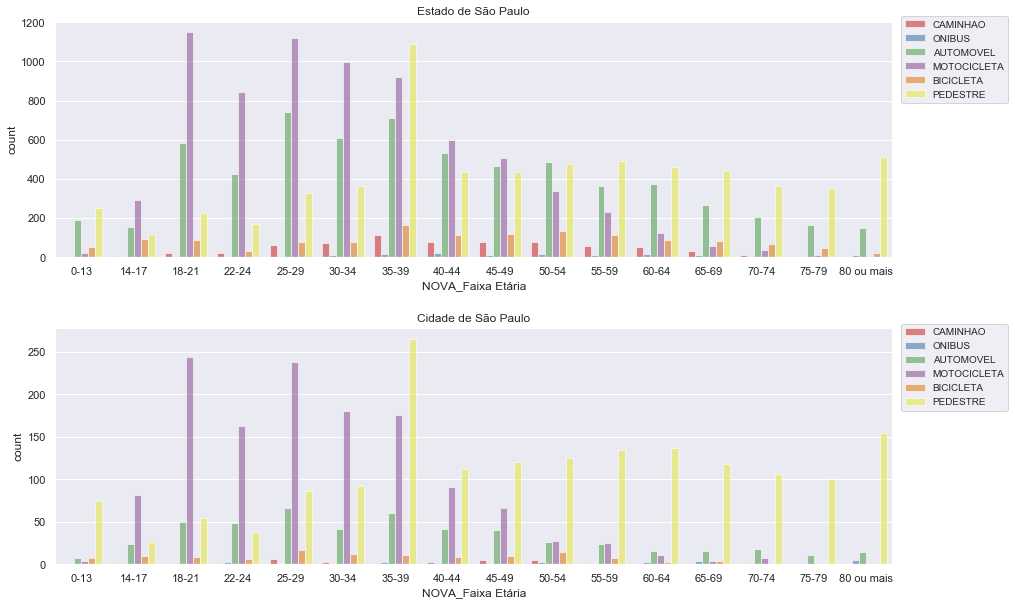

In [107]:
# Tipo de Veículo pela faixa etária - separando a capital do estado
plt.figure(figsize=(15,10))

#ESTADO SP - sem a capital
plt.subplot(211)
sns.countplot(x='NOVA_Faixa Etária', hue= 'Tipo Veiculo', data=base_all_3, alpha = alp, palette=pal3,
             order = ['0-13','14-17','18-21','22-24','25-29','30-34','35-39','40-44',
                      '45-49','50-54','55-59','60-64','65-69','70-74','75-79', '80 ou mais'],
             hue_order = ['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'])

plt.title('Estado de São Paulo')
plt.legend(loc=(1.01,0.65), fontsize=10)

#CIDADE SP
plt.subplot(212)
sns.countplot(x='NOVA_Faixa Etária', hue= 'Tipo Veiculo', data=base_sp, alpha = alp, palette=pal3,
             order = ['0-13','14-17','18-21','22-24','25-29','30-34','35-39','40-44',
                      '45-49','50-54','55-59','60-64','65-69','70-74','75-79', '80 ou mais'],
             hue_order = ['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'])
plt.title('Cidade de São Paulo')
plt.legend(loc=(1.01,0.65), fontsize=10)
plt.subplots_adjust(hspace=0.3,wspace=0.35)

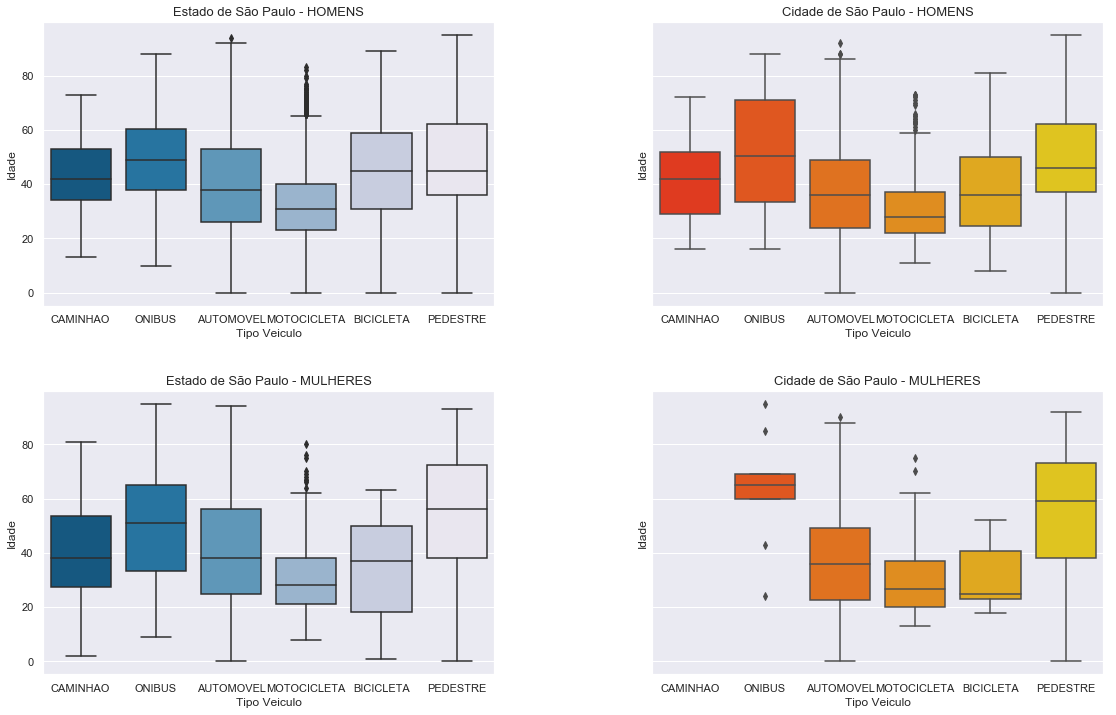

In [108]:
#Boxplot da Idade - em relação ao tipo de veículo - Separando HOMENS e MULHERES
# A Faixa de idade de motociclistas é menor em HOMENS na Capital
# As maiores idades estão concentradas nos pedestres
#Destaque para a idade dos óbitos de ONIBUS na Capital-HOMENS que é maior do que nos demais casos

dims = (19, 12)

fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2, figsize=dims, sharey=True)
sns.boxplot(x='Tipo Veiculo', y='Idade', data=base_all_3.loc[(
            base_all_3['Sexo'].str.contains('MASCULINO') == True)],  ax=ax1, palette='PuBu_r',
           order=['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'])

sns.boxplot(x='Tipo Veiculo', y='Idade', data=base_sp.loc[(
            base_sp['Sexo'].str.contains('MASCULINO') == True)],  ax=ax2, palette='autumn',
           order=['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'])

sns.boxplot(x='Tipo Veiculo', y='Idade', data=base_all_3.loc[
            base_all_3['Sexo'].str.contains('MASCULINO') == False],  ax=ax3, palette='PuBu_r',
           order=['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'])

sns.boxplot(x='Tipo Veiculo', y='Idade', data=base_sp.loc[
            base_sp['Sexo'].str.contains('MASCULINO') == False],  ax=ax4, palette='autumn',
           order=['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'])

ax1.set_title('Estado de São Paulo - HOMENS', size=titsz)
ax2.set_title('Cidade de São Paulo - HOMENS', size=titsz)
ax3.set_title('Estado de São Paulo - MULHERES', size=titsz)
ax4.set_title('Cidade de São Paulo - MULHERES', size=titsz)

plt.subplots_adjust(hspace=0.3,wspace=0.35)

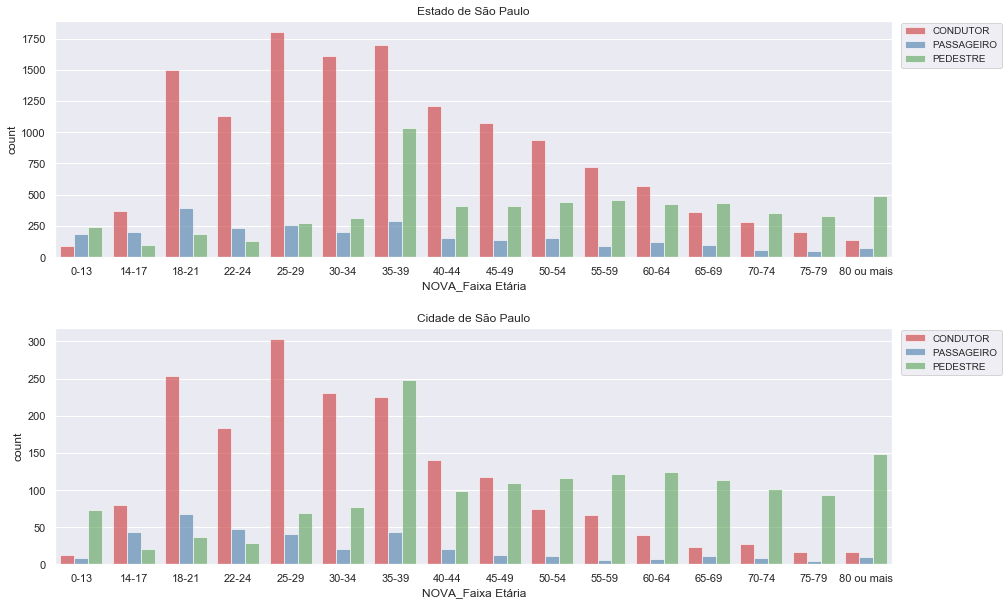

In [109]:
# Comparar Tipo de Vítma pela faixa etária - dividindo o Estado e a Capita

plt.figure(figsize=(15,10))

#ESTADO SP
plt.subplot(211)
sns.countplot(x='NOVA_Faixa Etária', hue= 'Tipo Vítima', data=base_all_3, alpha = alp,palette=pal3,
             order = ['0-13','14-17','18-21','22-24','25-29','30-34','35-39','40-44',
                      '45-49','50-54','55-59','60-64','65-69','70-74','75-79', '80 ou mais'],
              hue_order = ['CONDUTOR', 'PASSAGEIRO', 'PEDESTRE'],
             )
plt.title('Estado de São Paulo')
plt.legend(loc=(1.01,0.80), fontsize=10)

#CIDADE SP
plt.subplot(212)
sns.countplot(x='NOVA_Faixa Etária', hue= 'Tipo Vítima', data=base_sp, alpha = alp, palette=pal3,
             order = ['0-13','14-17','18-21','22-24','25-29','30-34','35-39','40-44',
                      '45-49','50-54','55-59','60-64','65-69','70-74','75-79', '80 ou mais'],
              hue_order = ['CONDUTOR', 'PASSAGEIRO', 'PEDESTRE'],
             )
plt.title('Cidade de São Paulo')
plt.legend(loc=(1.01,0.80), fontsize=10)

plt.subplots_adjust(hspace=0.3,wspace=0.35)

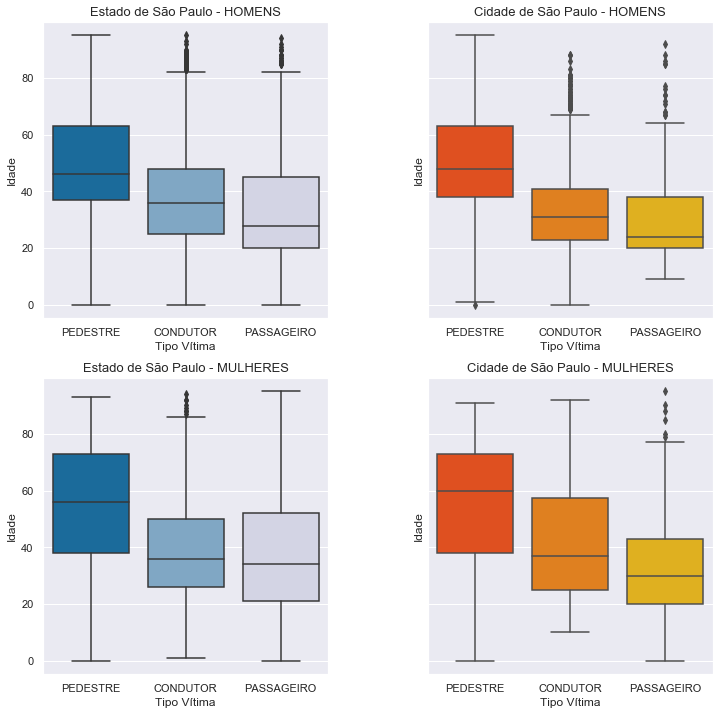

In [110]:
#Boxplot da Idade - em relação ao tipo de vítma - Separando HOMENS e MULHERES
# A faixa de idade dos condutores e passageiros HOMENS é menor na Capital
# No caso das MULHERES na Capital a menor faixa de idade está concentrado nos PASSAGEIROS

dims = (12, 12)

fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2, figsize=dims, sharey=True)
sns.boxplot(x='Tipo Vítima', y='Idade', data=base_all_3.loc[(
            base_all_3['Sexo'].str.contains('MASCULINO') == True)],  ax=ax1, palette='PuBu_r',
           order=['PEDESTRE','CONDUTOR','PASSAGEIRO'])

sns.boxplot(x='Tipo Vítima', y='Idade', data=base_sp.loc[(
            base_sp['Sexo'].str.contains('MASCULINO') == True)],  ax=ax2, palette='autumn',
           order=['PEDESTRE','CONDUTOR','PASSAGEIRO'])

sns.boxplot(x='Tipo Vítima', y='Idade', data=base_all_3.loc[
            base_all_3['Sexo'].str.contains('MASCULINO') == False],  ax=ax3, palette='PuBu_r',
           order=['PEDESTRE','CONDUTOR','PASSAGEIRO'])

sns.boxplot(x='Tipo Vítima', y='Idade', data=base_sp.loc[
            base_sp['Sexo'].str.contains('MASCULINO') == False],  ax=ax4, palette='autumn',
           order=['PEDESTRE','CONDUTOR','PASSAGEIRO'])

ax1.set_title('Estado de São Paulo - HOMENS', size=titsz)
ax2.set_title('Cidade de São Paulo - HOMENS', size=titsz)
ax3.set_title('Estado de São Paulo - MULHERES', size=titsz)
ax4.set_title('Cidade de São Paulo - MULHERES', size=titsz)

plt.subplots_adjust(hspace=0.2,wspace=0.35)

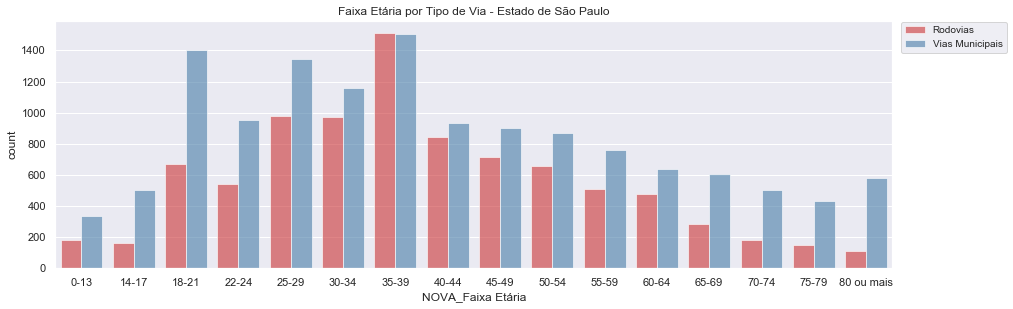

In [111]:
# Tipo de via pela faixa etária- Separando a capital do estado
plt.figure(figsize=(15,10))

#ESTADO SP - todo
plt.subplot(211)
sns.countplot(x='NOVA_Faixa Etária', hue= 'Tipo de Via', data=base_all_3,
             order = ['0-13','14-17','18-21','22-24','25-29','30-34','35-39','40-44',
                      '45-49','50-54','55-59','60-64','65-69','70-74','75-79', '80 ou mais'], alpha = alp, palette=pal3)
plt.title('Faixa Etária por Tipo de Via - Estado de São Paulo')
plt.legend(loc=(1.01,0.87), fontsize=10)

Text(0.5, 1.0, 'Cidade de São Paulo - MULHERES')

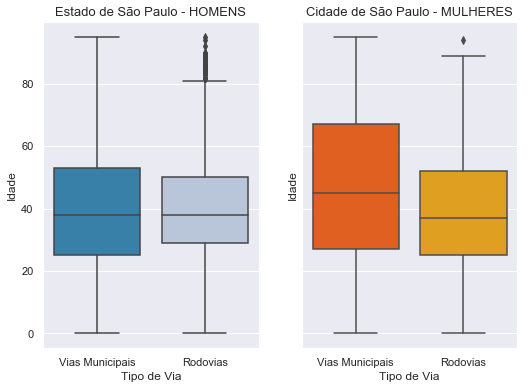

In [112]:
#Boxplot da Idade - em relação ao tipo de via - Separando Homens e Mulheres
#No caso das Vias Municipais, a faixa de idade das MULHERES é maios, sendo a mediana cerca de 45 anos; entre os homens a mediana
# é de cerca de 38 anos.
#Nas Rodovias a diferença entre os HOMENS e MULHERES não é tão grande, sendo a mediana de cerca de 38 anos

dims = (8.5, 6)

fig, [ax1, ax2] = plt.subplots(1,2, figsize=dims, sharey=True)
sns.boxplot(x='Tipo de Via', y='Idade', data=base_all_3.loc[(
            base_all_3['Sexo'].str.contains('MASCULINO') == True)],  ax=ax1, palette='PuBu_r',
           order=['Vias Municipais', 'Rodovias'])

sns.boxplot(x='Tipo de Via', y='Idade', data=base_all_3.loc[(
            base_all_3['Sexo'].str.contains('MASCULINO') == False)],  ax=ax2, palette='autumn',
           order=['Vias Municipais', 'Rodovias'])

ax1.set_title('Estado de São Paulo - HOMENS', size=titsz)
ax2.set_title('Cidade de São Paulo - MULHERES', size=titsz)

### Separando Faixa Etária de 18-24 e 35-39 (alto índice de óbitos)


In [113]:
# Separar uma parte da base de faixa etária 35-39
#Estado de São Paulo
base_35_39 = base_all_3.loc[base_all_3['NOVA_Faixa Etária'].str.contains('35-39')]
#Cidade de São Paulo
base_sp_35_39 = base_sp.loc[base_sp['NOVA_Faixa Etária'].str.contains('35-39')]

base_sp_35_39.info()
base_35_39.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 376 to 1146
Data columns (total 22 columns):
Cidade Considerada                517 non-null object
Região Administrativa             517 non-null object
Ano Óbito                         517 non-null int64
Mês Óbito                         517 non-null int64
Mês Descrição                     517 non-null object
Sexo                              517 non-null object
Turno                             517 non-null object
Tipo Acidente                     517 non-null object
SubTipo do Acidente               517 non-null object
Tipo Veiculo                      517 non-null object
Faixa Etária                      517 non-null object
Idade                             517 non-null int64
Tipo Vítima                       517 non-null object
Tipo Local do Acidente            517 non-null object
Dia Semana                        517 non-null object
Tipo de Via                       517 non-null object
LAT_(geo)                      

In [114]:
# Separar uma parte da base de faixa etária 18-24

#Estado de São Paulo
base_18_24 = base_all_3.loc[base_all_3['NOVA_Faixa Etária'].str.contains('18-21|22-24')]
#Cidade de São Paulo
base_sp_18_24 = base_sp.loc[base_sp['NOVA_Faixa Etária'].str.contains('18-21|22-24')]

base_sp_18_24.info()
base_18_24.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619 entries, 373 to 1159
Data columns (total 22 columns):
Cidade Considerada                619 non-null object
Região Administrativa             619 non-null object
Ano Óbito                         619 non-null int64
Mês Óbito                         619 non-null int64
Mês Descrição                     619 non-null object
Sexo                              619 non-null object
Turno                             619 non-null object
Tipo Acidente                     619 non-null object
SubTipo do Acidente               619 non-null object
Tipo Veiculo                      619 non-null object
Faixa Etária                      619 non-null object
Idade                             619 non-null int64
Tipo Vítima                       619 non-null object
Tipo Local do Acidente            619 non-null object
Dia Semana                        619 non-null object
Tipo de Via                       619 non-null object
LAT_(geo)                      

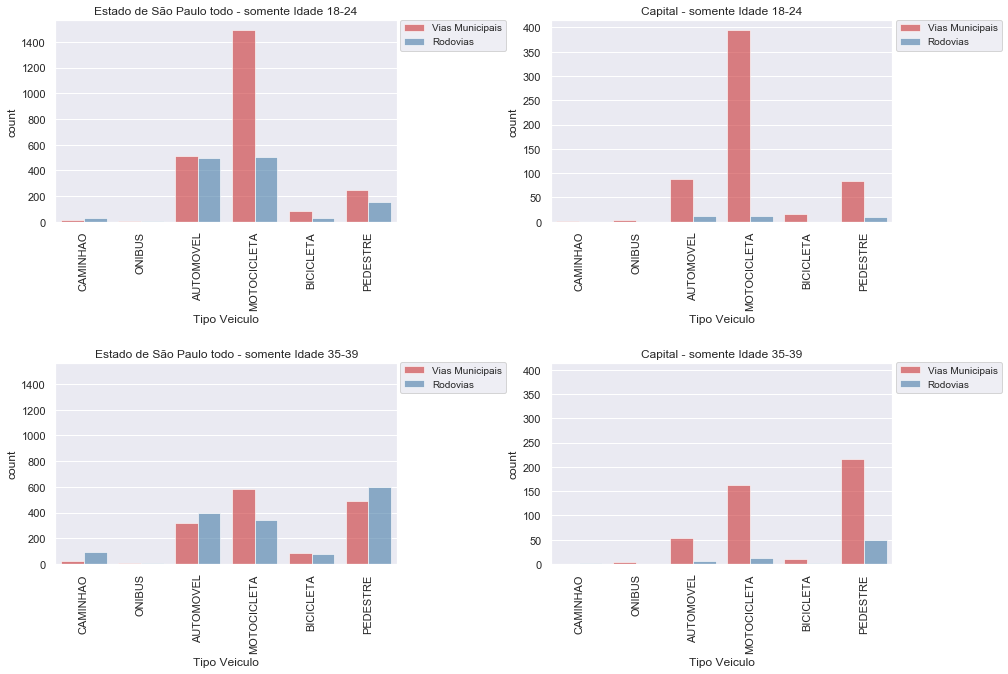

In [115]:
# Tipo de veículo por tipo de via - somente idade entre 18-24 e 35-39
#18-24 anos: o índice de óbitos por motocicleta é bem mais alto do que nos demais veículos
#35-39 anos: os maiores índices estão concentrados entre motocicletas, pedestres e automóveis

plt.figure(figsize=(15,10))

#ESTADO SP - todo
plt.subplot(221)
ax1 = sns.countplot(x='Tipo Veiculo', hue= 'Tipo de Via', data=base_18_24,
             order = ['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'],
              hue_order=['Vias Municipais', 'Rodovias'],
              alpha = alp, palette=pal3)
plt.title('Estado de São Paulo todo - somente Idade 18-24')
plt.xticks(rotation=angulo)
plt.legend(loc=(1.01,0.85), fontsize=10)

# Estado sem a capital
plt.subplot(222)
ax2 = sns.countplot(x='Tipo Veiculo', hue= 'Tipo de Via', data=base_sp_18_24,
             order = ['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'],
              hue_order=['Vias Municipais', 'Rodovias'],
              alpha = alp, palette=pal3)
plt.title('Capital - somente Idade 18-24')
plt.xticks(rotation=angulo)
plt.legend(loc=(1.01,0.85), fontsize=10)

#ESTADO SP - todo
plt.subplot(223, sharey=ax1)
ax3 = sns.countplot(x='Tipo Veiculo', hue= 'Tipo de Via', data=base_35_39,
             order = ['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'],
              hue_order=['Vias Municipais', 'Rodovias'],
              alpha = alp, palette=pal3)
plt.title('Estado de São Paulo todo - somente Idade 35-39')
plt.xticks(rotation=angulo)
plt.legend(loc=(1.01,0.85), fontsize=10)

# Estado sem a capital
plt.subplot(224, sharey=ax2)
ax4 = sns.countplot(x='Tipo Veiculo', hue= 'Tipo de Via', data=base_sp_35_39,
             order = ['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'],
              hue_order=['Vias Municipais', 'Rodovias'],
              alpha = alp, palette=pal3)
plt.title('Capital - somente Idade 35-39')
plt.xticks(rotation=angulo)
plt.legend(loc=(1.01,0.85), fontsize=10)

plt.subplots_adjust(hspace=0.7,wspace=0.45)


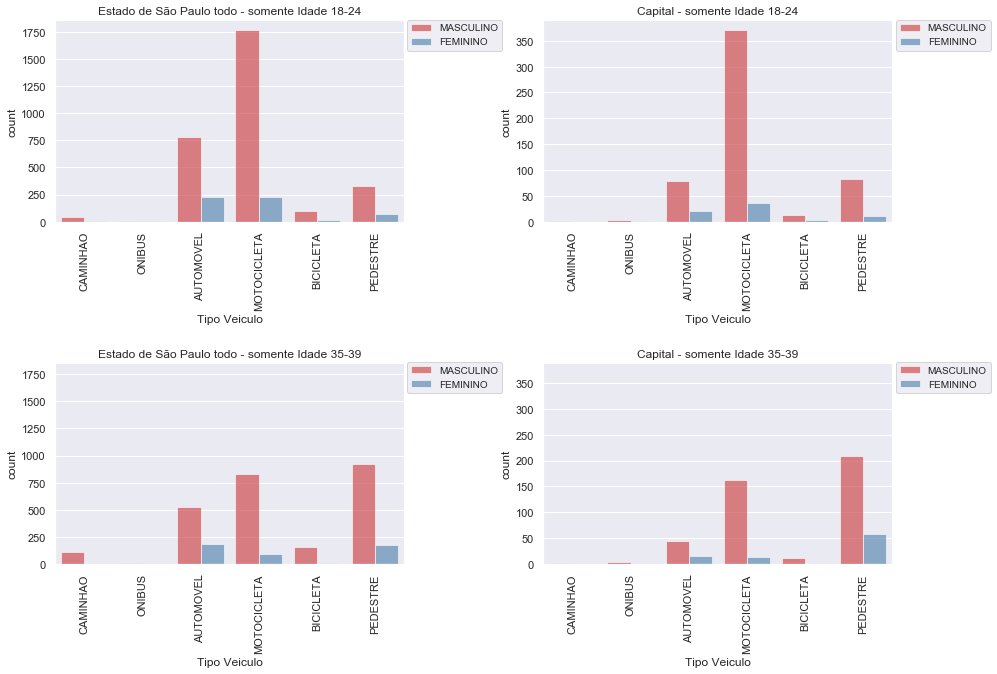

In [116]:
# Tipo de veículo por sexo - somente idade entre 18-24 e 35-39
#18-24: Principal motivo de óbitos é por motocicleta, homens e maior indice na capital
#35-39: principal motivo são óbitos por pedestres e motocicletas
plt.figure(figsize=(15,10))

#ESTADO SP - todo
plt.subplot(221)
ax1 = sns.countplot(x='Tipo Veiculo', hue= 'Sexo', data=base_18_24,
             order = ['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'],
              alpha = alp, palette=pal3)
plt.title('Estado de São Paulo todo - somente Idade 18-24')
plt.xticks(rotation=angulo)
plt.legend(loc=(1.01,0.85), fontsize=10)

# CAPITAL
plt.subplot(222)
ax2 = sns.countplot(x='Tipo Veiculo', hue= 'Sexo', data=base_sp_18_24,
             order = ['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'],
              alpha = alp, palette=pal3)
plt.title('Capital - somente Idade 18-24')
plt.xticks(rotation=angulo)
plt.legend(loc=(1.01,0.85), fontsize=10)

#ESTADO SP - todo
plt.subplot(223, sharey=ax1)
ax3 = sns.countplot(x='Tipo Veiculo', hue= 'Sexo', data=base_35_39,
             order = ['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'],
              alpha = alp, palette=pal3)
plt.title('Estado de São Paulo todo - somente Idade 35-39')
plt.xticks(rotation=angulo)
plt.legend(loc=(1.01,0.85), fontsize=10)

# CAPITAL
plt.subplot(224, sharey=ax2)
ax4 = sns.countplot(x='Tipo Veiculo', hue= 'Sexo', data=base_sp_35_39,
             order = ['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'],
              alpha = alp, palette=pal3)
plt.title('Capital - somente Idade 35-39')
plt.xticks(rotation=angulo)
plt.legend(loc=(1.01,0.85), fontsize=10)

plt.subplots_adjust(hspace=0.7,wspace=0.40)

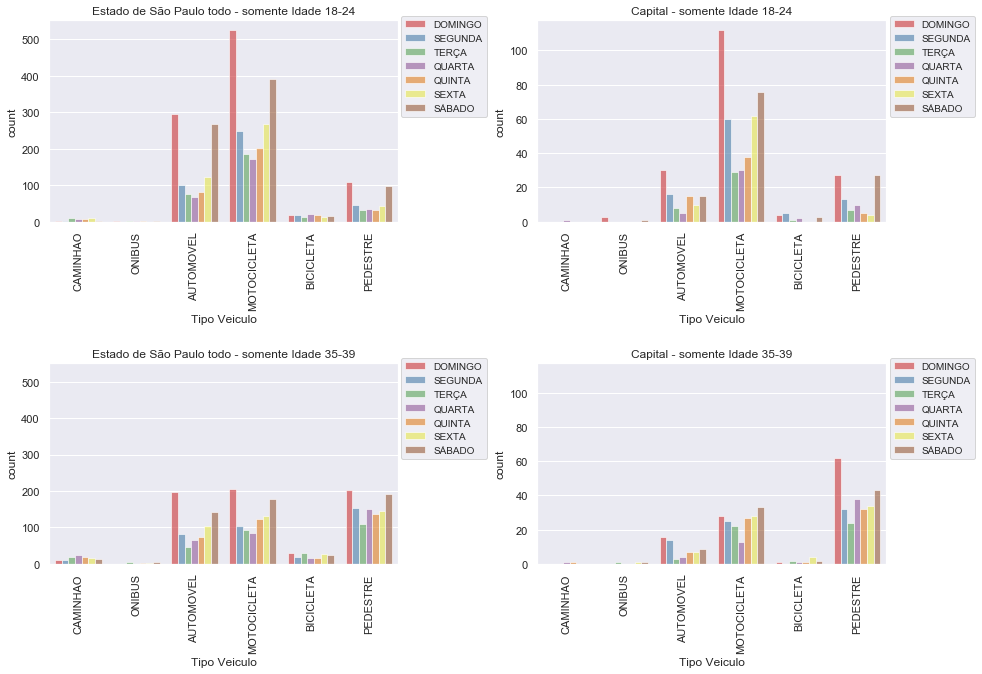

In [117]:
# Tipo de veículo por dia de semana - somente idade entre 18-24 e 35-39
#18-24: No caso das motocicletas, o índice de óbitos aumenta muito nos finas de semana e SEGUNDA e SEXTA - principalmente
# na capital - avaliar a influência dos trabalhadores de MOTOCICLETAS - entregadores
#35-39: existe um aumento no índice de obitos de pedestres no domingo na capital

plt.figure(figsize=(15,10))

#ESTADO SP - todo
plt.subplot(221)
ax1 = sns.countplot(x='Tipo Veiculo', hue= 'Dia Semana', data=base_18_24,
             order = ['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'],
              hue_order=['DOMINGO', 'SEGUNDA', 'TERÇA', 'QUARTA', 'QUINTA', 'SEXTA', 'SÁBADO'],
              alpha = alp, palette=pal3)
plt.title('Estado de São Paulo todo - somente Idade 18-24')
plt.xticks(rotation=angulo)
plt.legend(loc=(1.01,0.52), fontsize=10)

# CAPITAL
plt.subplot(222)
ax2 = sns.countplot(x='Tipo Veiculo', hue= 'Dia Semana', data=base_sp_18_24,
             order = ['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'],
              hue_order=['DOMINGO', 'SEGUNDA', 'TERÇA', 'QUARTA', 'QUINTA', 'SEXTA', 'SÁBADO'],
              alpha = alp, palette=pal3)
plt.title('Capital - somente Idade 18-24')
plt.xticks(rotation=angulo)
plt.legend(loc=(1.01,0.52), fontsize=10)

#ESTADO SP - todo
plt.subplot(223, sharey=ax1)
ax3 = sns.countplot(x='Tipo Veiculo', hue= 'Dia Semana', data=base_35_39,
             order = ['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'],
              hue_order=['DOMINGO', 'SEGUNDA', 'TERÇA', 'QUARTA', 'QUINTA', 'SEXTA', 'SÁBADO'],
              alpha = alp, palette=pal3)
plt.title('Estado de São Paulo todo - somente Idade 35-39')
plt.xticks(rotation=angulo)
plt.legend(loc=(1.01,0.52), fontsize=10)

# CAPITAL
plt.subplot(224, sharey=ax2)
ax4 = sns.countplot(x='Tipo Veiculo', hue= 'Dia Semana', data=base_sp_35_39,
             order = ['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'],
              hue_order=['DOMINGO', 'SEGUNDA', 'TERÇA', 'QUARTA', 'QUINTA', 'SEXTA', 'SÁBADO'],
              alpha = alp, palette=pal3)
plt.title('Capital - somente Idade 35-39')
plt.xticks(rotation=angulo)
plt.legend(loc=(1.01,0.52), fontsize=10)

plt.subplots_adjust(hspace=0.7,wspace=0.40)

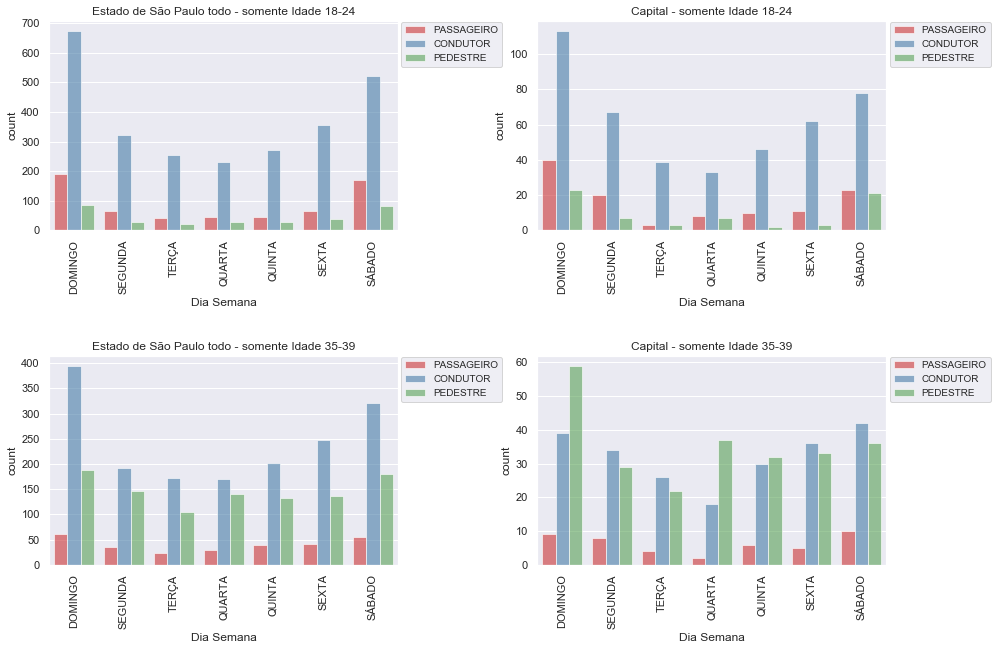

In [118]:
# Tipo de vitima por dia de semana - somente idade entre 18-24 e 35-39
#18-24: principalmente óbito do condutor, com aumento no domingo
#35-39: existe um aumento no índice de óbitos de pedestres, sendo que na capital esse índice iguala ou ultrapassa os valores
#de condutores - DOMINGO

plt.figure(figsize=(15,10))

#ESTADO SP - todo
plt.subplot(221)
sns.countplot(x='Dia Semana', hue= 'Tipo Vítima', data=base_18_24,
             hue_order = ['PASSAGEIRO','CONDUTOR','PEDESTRE'],
              order=['DOMINGO', 'SEGUNDA', 'TERÇA', 'QUARTA', 'QUINTA', 'SEXTA', 'SÁBADO'],
              alpha = alp, palette=pal3)
plt.title('Estado de São Paulo todo - somente Idade 18-24')
plt.xticks(rotation=angulo)
plt.legend(loc=(1.01,0.78), fontsize=10)

# CAPITAL
plt.subplot(222)
sns.countplot(x='Dia Semana', hue='Tipo Vítima' , data=base_sp_18_24,
             hue_order = ['PASSAGEIRO','CONDUTOR','PEDESTRE'],
              order=['DOMINGO', 'SEGUNDA', 'TERÇA', 'QUARTA', 'QUINTA', 'SEXTA', 'SÁBADO'],
              alpha = alp, palette=pal3)
plt.title('Capital - somente Idade 18-24')
plt.xticks(rotation=angulo)
plt.legend(loc=(1.01,0.78), fontsize=10)

#ESTADO SP - todo
plt.subplot(223)
sns.countplot(x='Dia Semana', hue= 'Tipo Vítima', data=base_35_39,
             hue_order = ['PASSAGEIRO','CONDUTOR','PEDESTRE'],
              order=['DOMINGO', 'SEGUNDA', 'TERÇA', 'QUARTA', 'QUINTA', 'SEXTA', 'SÁBADO'],
              alpha = alp, palette=pal3)
plt.title('Estado de São Paulo todo - somente Idade 35-39')
plt.xticks(rotation=angulo)
plt.legend(loc=(1.01,0.78), fontsize=10)

# CAPITAL
plt.subplot(224)
sns.countplot(x='Dia Semana', hue='Tipo Vítima' , data=base_sp_35_39,
             hue_order = ['PASSAGEIRO','CONDUTOR','PEDESTRE'],
              order=['DOMINGO', 'SEGUNDA', 'TERÇA', 'QUARTA', 'QUINTA', 'SEXTA', 'SÁBADO'],
              alpha = alp, palette=pal3)
plt.title('Capital - somente Idade 35-39')
plt.xticks(rotation=angulo)
plt.legend(loc=(1.01,0.78), fontsize=10)

plt.subplots_adjust(hspace=0.6,wspace=0.40)

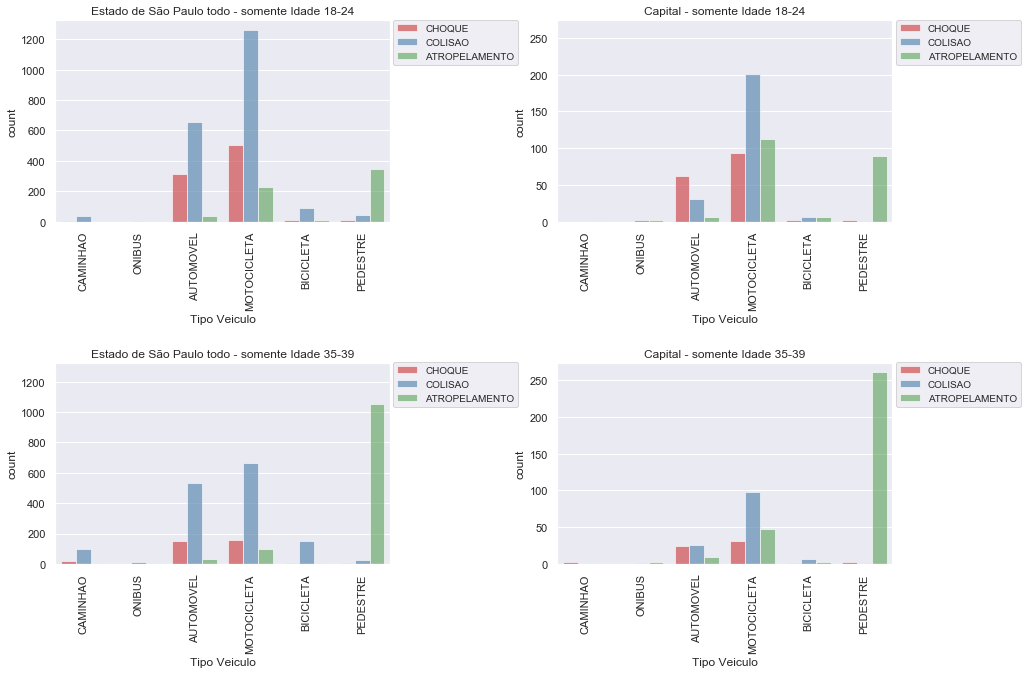

In [119]:
# Tipo de veículo por tipo acidente - somente idade entre 18-24 e 35-39
# choque (embate do veículo contra qualquer corpo fixo, ou sofrido por aquele quando imobilizado),
# colisão (embate do veículo com qualquer outro corpo em movimento)

# Olhar a diferença entre COLISÃO e CHOQUE de automóvel em SP(mais colisão- parado, entre 18-24)
# e estado(mais choque - movimento as duas faixas)

plt.figure(figsize=(15,10))

#ESTADO SP - todo
plt.subplot(221)
ax1 = sns.countplot(x='Tipo Veiculo', hue= 'Tipo Acidente', data=base_18_24,
             order = ['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'],
              hue_order=['CHOQUE','COLISAO', 'ATROPELAMENTO'],
              alpha = alp, palette=pal3)
plt.title('Estado de São Paulo todo - somente Idade 18-24')
plt.xticks(rotation=angulo)
plt.legend(loc=(1.01,0.78), fontsize=10)

# CAPITAL
plt.subplot(222)
ax2 = sns.countplot(x='Tipo Veiculo', hue= 'Tipo Acidente', data=base_sp_18_24,
             order = ['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'],
              hue_order=['CHOQUE','COLISAO', 'ATROPELAMENTO'],
              alpha = alp, palette=pal3)
plt.title('Capital - somente Idade 18-24')
plt.xticks(rotation=angulo)
plt.legend(loc=(1.01,0.78), fontsize=10)

#ESTADO SP - todo
plt.subplot(223, sharey=ax1)
ax3 = sns.countplot(x='Tipo Veiculo', hue= 'Tipo Acidente', data=base_35_39,
             order = ['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'],
              hue_order=['CHOQUE','COLISAO', 'ATROPELAMENTO'],
              alpha = alp, palette=pal3)
plt.title('Estado de São Paulo todo - somente Idade 35-39')
plt.xticks(rotation=angulo)
plt.legend(loc=(1.01,0.78), fontsize=10)

# CAPITAL
plt.subplot(224, sharey=ax2)
ax4 = sns.countplot(x='Tipo Veiculo', hue= 'Tipo Acidente', data=base_sp_35_39,
             order = ['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'],
              hue_order=['CHOQUE','COLISAO', 'ATROPELAMENTO'],
              alpha = alp, palette=pal3)
plt.title('Capital - somente Idade 35-39')
plt.xticks(rotation=angulo)
plt.legend(loc=(1.01,0.78), fontsize=10)

plt.subplots_adjust(hspace=0.7,wspace=0.5)

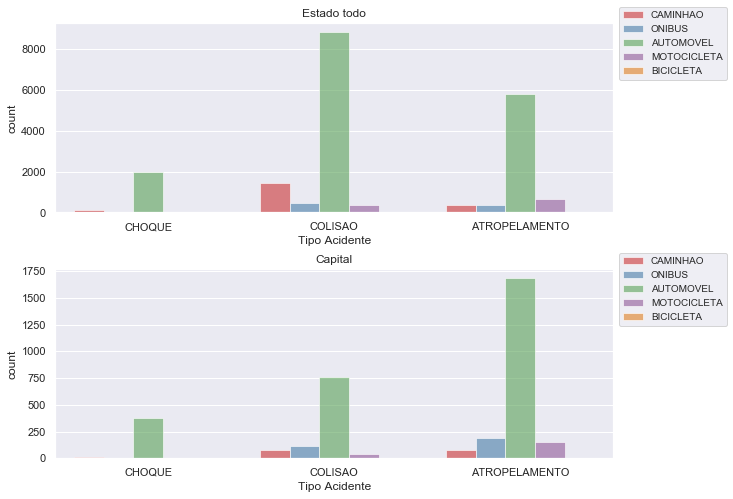

In [120]:
# Entender Atropelamento - com qual veículo
# Na capital tem maior número de automóveis envolvidos em atropelamento do que colisões | oposto no estado
# Na capital tem um maior número de óbitos por atropelamente do ônibus, se comparado ao estado
# No estado tem um número mais elevado de colisões envolvendo caminhões que a capital, provavelmente na estrada

plt.figure(figsize=(10,8))

#ESTADO SP - todo
plt.subplot(211)
ax1 = sns.countplot(x='Tipo Acidente', hue= 'Outro Veículo Envolvido', data=base_all_3,
             order = ['CHOQUE','COLISAO','ATROPELAMENTO'],
              hue_order=['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA'],
             alpha = alp, palette=pal3)
plt.title('Estado todo')
plt.legend(loc=(1.01,0.70), fontsize=10)

# CAPITAL
plt.subplot(212)
ax2 = sns.countplot(x='Tipo Acidente', hue= 'Outro Veículo Envolvido', data=base_sp,
             order = ['CHOQUE','COLISAO','ATROPELAMENTO'],
              hue_order=['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA'],
             alpha = alp, palette=pal3)
plt.title('Capital')
plt.legend(loc=(1.01,0.70), fontsize=10)

plt.subplots_adjust(hspace=0.3,wspace=0.35)

### Entendendo as diferenças entre as Regiões Administrativas

Text(0.5, 1.0, 'Região Administrativa em relação aos anos')

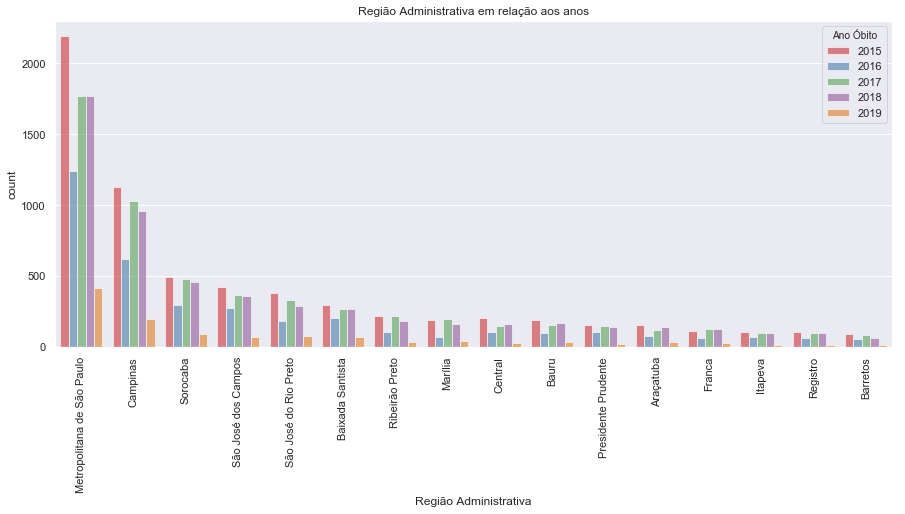

In [121]:
# Regiões Administrativas em relação aos anos - considerar subnotificação de 2016
# Maiores casos na Região Metropolitada e Campinas, com pouca ou nenhuma redução entre 2017 e 2018
plt.figure(figsize=(15,6))

sns.countplot(x='Região Administrativa', hue= 'Ano Óbito', data=base_all_3, alpha = alp, palette=pal3,
             order=base_all_3['Região Administrativa'].value_counts().index)
plt.xticks(rotation=angulo)
plt.title('Região Administrativa em relação aos anos')

Text(0.5, 1.0, 'Região Administrativa em relação aos anos - sem a Regiao Metropolitna e Campinas')

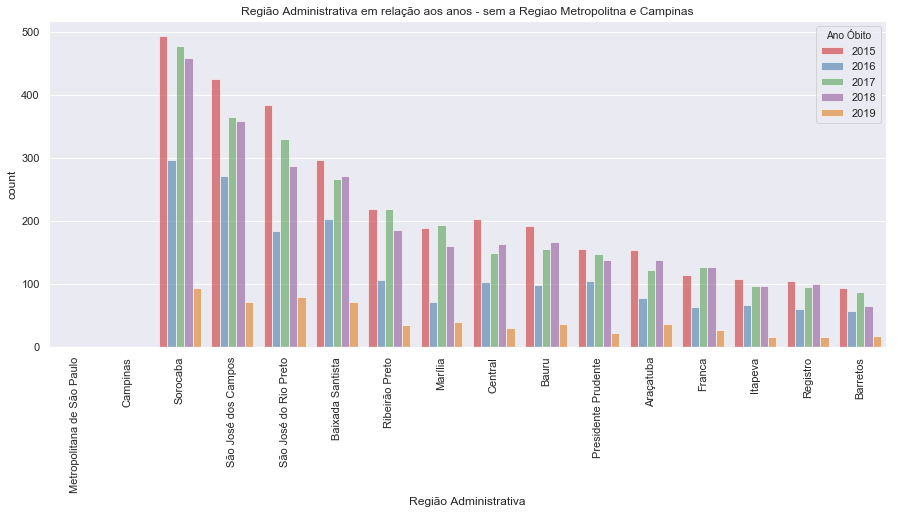

In [122]:
# Regiões Administrativas em relação aos anos - considerar subnotificação de 2016
# Tirando a Região Metropolitana e Campinas - para entender o interior
# Regiões de Baixada Santista, Bauru, Central Araçatuba e Registro tiveram aumento no ano de 2018 em relação a 2017

plt.figure(figsize=(15,6))

sns.countplot(x='Região Administrativa', hue= 'Ano Óbito', data=base_all_3.loc[
              base_all_3['Região Administrativa'].str.contains('Metropolitana de São Paulo|Campinas')==False],
              alpha = alp, palette=pal3,
              order=base_all_3['Região Administrativa'].value_counts().index)

plt.xticks(rotation=angulo)
plt.title('Região Administrativa em relação aos anos - sem a Regiao Metropolitna e Campinas')

Text(0.5, 1.0, 'Região Administrativa em relação ao Tipo de Veículo')

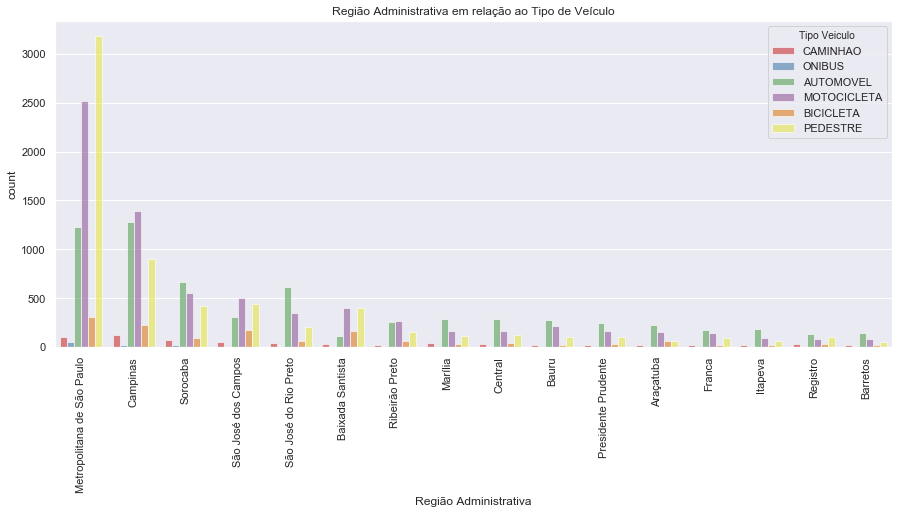

In [123]:
# Região Administrativa pelo tipo de veículo 
# Existem 2 tipos: Região Metropolitana, Baixada Santista, São José dos Campos - mais acidente motociclista e pedestre;
# demais é mais acentuado o óbito por automóvel

plt.figure(figsize=(15,6))

sns.countplot(x='Região Administrativa', hue= 'Tipo Veiculo', data=base_all_3,
             alpha = alp, palette=pal3,
             order=base_all_3['Região Administrativa'].value_counts().index,
             hue_order=['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'])

plt.xticks(rotation=angulo)
plt.title('Região Administrativa em relação ao Tipo de Veículo')

Text(0.5, 1.0, 'Região Administrativa em relação ao Tipo de Acidente')

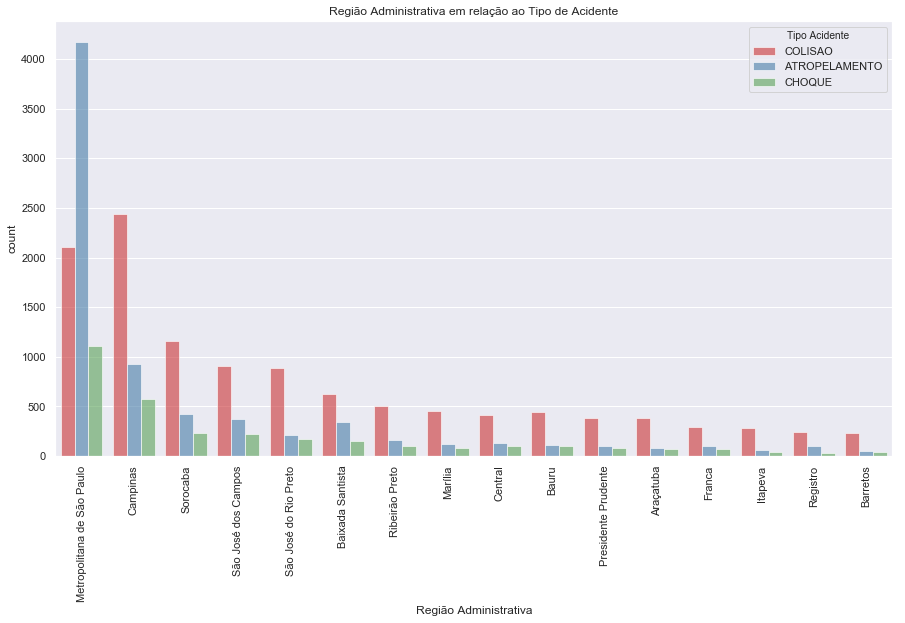

In [124]:
# Região Administrativa pelo tipo de acidente
# O índice atropelamentos na Região Metropolitana é altíssimo em relação ao resto do estado
# As demais regiões o principal motivo é a colisão
plt.figure(figsize=(15,8))

sns.countplot(x='Região Administrativa', hue= 'Tipo Acidente', data=base_all_3,
             alpha = alp, palette=pal3,
             order=base_all_3['Região Administrativa'].value_counts().index)

plt.xticks(rotation=angulo)
plt.title('Região Administrativa em relação ao Tipo de Acidente')

### Entender a gravidade dos acidentes que resultam em óbito

Text(0.5, 1.0, 'Tempo entre o Acidente e o Óbito em relação ao Tipo de Acidente')

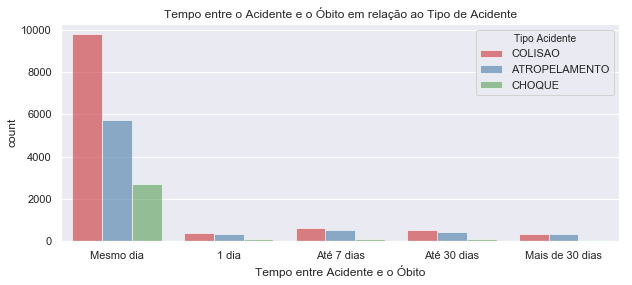

In [125]:
# Tempo entre o Acidente e o Óbito e o tipo de acidente
# A maior parte de óbitos no mesmo dia resulta de acidentes de colisão

plt.figure(figsize=(10,4))

sns.countplot(x='Tempo entre Acidente e o Óbito', hue= 'Tipo Acidente', data=base_all_3,
             alpha = alp, palette=pal3,
             order=['Mesmo dia', '1 dia', 'Até 7 dias', 'Até 30 dias', 'Mais de 30 dias'])

plt.title('Tempo entre o Acidente e o Óbito em relação ao Tipo de Acidente')

Text(0.5, 1.0, 'Tempo entre o Acidente e o Óbito em relação ao Tipo de Veículo')

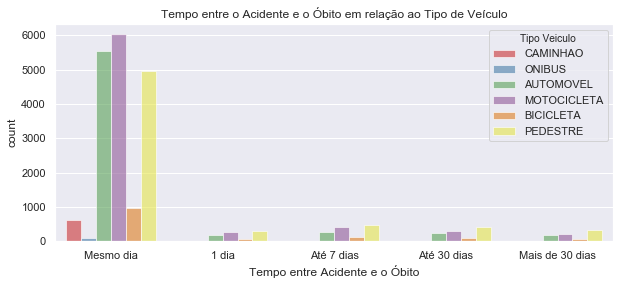

In [126]:
# Tempo entre o Acidente e o Óbito e o tipo de veículo
# Acidentes mais graves resultam de motocicletas e automóveis, seguido de pedestres
# As vítimas que vem a óbito alguns dias depois do acidente tem leve predominância de pedestres

plt.figure(figsize=(10,4))

sns.countplot(x='Tempo entre Acidente e o Óbito', hue= 'Tipo Veiculo', data=base_all_3,
             alpha = alp,palette=pal3,
             order=['Mesmo dia', '1 dia', 'Até 7 dias', 'Até 30 dias', 'Mais de 30 dias'],
             hue_order=['CAMINHAO','ONIBUS','AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'PEDESTRE'])

plt.title('Tempo entre o Acidente e o Óbito em relação ao Tipo de Veículo')

Text(0.5, 1.0, 'Tempo entre o Acidente e o Óbito em relação ao Tipo de Via')

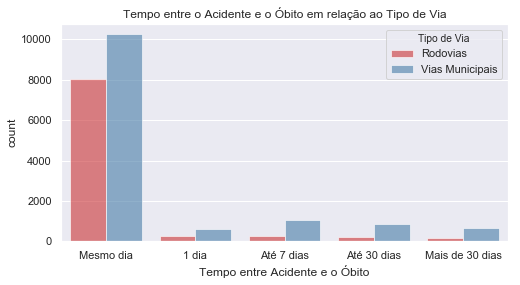

In [127]:
# Tempo entre o Acidente e o Óbito e o tipo de via
# Os acidentes de rodovia levam a óbito no mesmo dia na quase totalidade dos casos - isso pode indicar a gravidade dos acidentes
# No caso das Vias Municipais ainda existe uma pequena proporção que leva mais dias - 1 sema a 1 mês até o óbito
plt.figure(figsize=(8,4))

sns.countplot(x='Tempo entre Acidente e o Óbito', hue= 'Tipo de Via', data=base_all_3,
             alpha = alp, palette=pal3,
             order=['Mesmo dia', '1 dia', 'Até 7 dias', 'Até 30 dias', 'Mais de 30 dias'])

plt.title('Tempo entre o Acidente e o Óbito em relação ao Tipo de Via')